###Mordred

In [ ]:
# Установка зависимостей
!pip install "networkx==2.3" "decorator==4.3.0" "numpy<1.24" mordred[full] rdkit-pypi

import sys
import math
from fractions import Fraction
from unittest.mock import patch
import numpy as np

# Исправление для numpy.float
if not hasattr(np, 'float'):
    np.float = float

# Исправление для fractions.gcd
sys.modules['fractions'].gcd = math.gcd

with patch('networkx.algorithms.dag.gcd', math.gcd):
    from mordred import Calculator, descriptors
    from rdkit import Chem

# Проверка работы
smiles = 'CCO'
mol = Chem.MolFromSmiles(smiles)
calc = Calculator(descriptors)
print(calc(mol))


<ipython-input-1-116960062>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not hasattr(np, 'float'):


Result({'ABC': 1.4142135623730951, 'ABCGG': 1.4142135623730951, 'nAcid': 0, 'nBase': 0, 'SpAbs_A': 2.82842712474619, 'SpMax_A': 1.414213562373095, 'SpDiam_A': 2.82842712474619, 'SpAD_A': 2.82842712474619, 'SpMAD_A': 0.9428090415820632, 'LogEE_A': 1.8494570055365824, 'VE1_A': 1.7071067811865472, 'VE2_A': 0.569035593728849, 'VE3_A': -0.6691728075863657, 'VR1_A': 3.363585661014859, 'VR2_A': 1.1211952203382862, 'VR3_A': 0.009034761653968602, 'nAromAtom': 0, 'nAromBond': 0, 'nAtom': 9, 'nHeavyAtom': 3, 'nSpiro': 0, 'nBridgehead': 0, 'nHetero': 1, 'nH': 6, 'nB': 0, 'nC': 2, 'nN': 0, 'nO': 1, 'nS': 0, 'nP': 0, 'nF': 0, 'nCl': 0, 'nBr': 0, 'nI': 0, 'nX': 0, 'ATS0dv': 30.0, 'ATS1dv': 12.0, 'ATS2dv': 5.0, 'ATS3dv': 0.0, 'ATS4dv': 0.0, 'ATS5dv': 0.0, 'ATS6dv': 0.0, 'ATS7dv': 0.0, 'ATS8dv': 0.0, 'ATS0d': 12.0, 'ATS1d': 12.0, 'ATS2d': 17.0, 'ATS3d': 12.0, 'ATS4d': 3.0, 'ATS5d': 0.0, 'ATS6d': 0.0, 'ATS7d': 0.0, 'ATS8d': 0.0, 'ATS0s': 48.25, 'ATS1s': 27.0, 'ATS2s': 38.0, 'ATS3s': 28.0, 'ATS4s': 3.0, 

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

In [ ]:
# Инициализация калькулятора с 2D-дескрипторами
calc = Calculator(descriptors, ignore_3D=True)

# Пример данных: SMILES молекул
smiles_list = [
    'CCO',    # этанол
    'C1=CC=CC=C1',  # бензол
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'  # кофеин
]

# Преобразование SMILES в молекулярные объекты
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Визуализация молекул
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200))

# Расчет дескрипторов
df = calc.pandas(mols)

# Обработка пропущенных значений
df = df.dropna(axis=1)

# Отображение первых 10 дескрипторов
print(f"Рассчитано {df.shape[1]} дескрипторов для {df.shape[0]} молекул")
df.iloc[:, :10].style.background_gradient(cmap='viridis')

100%|██████████| 3/3 [00:00<00:00,  4.64it/s]


Рассчитано 1613 дескрипторов для 3 молекул


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A
0,1.414214,1.414214,0,0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457
1,4.242641,4.000000,0,0,8.000000,2.000000,4.000000,8.000000,1.333333,2.687624
2,10.870470,10.470730,0,0,17.668229,2.504977,4.932793,17.668229,1.262016,3.586590


In [ ]:
df.style.background_gradient(cmap='viridis')

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,VE3_A,VR1_A,VR2_A,VR3_A,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,nHetero,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0dv,ATS1dv,ATS2dv,ATS3dv,ATS4dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d,ATS6d,ATS7d,ATS8d,ATS0s,ATS1s,ATS2s,ATS3s,ATS4s,ATS5s,ATS6s,ATS7s,ATS8s,ATS0Z,ATS1Z,ATS2Z,ATS3Z,ATS4Z,ATS5Z,ATS6Z,ATS7Z,ATS8Z,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,ATS0se,ATS1se,ATS2se,ATS3se,ATS4se,ATS5se,ATS6se,ATS7se,ATS8se,ATS0pe,ATS1pe,ATS2pe,ATS3pe,ATS4pe,ATS5pe,ATS6pe,ATS7pe,ATS8pe,ATS0are,ATS1are,ATS2are,ATS3are,ATS4are,ATS5are,ATS6are,ATS7are,ATS8are,ATS0p,ATS1p,ATS2p,ATS3p,ATS4p,ATS5p,ATS6p,ATS7p,ATS8p,ATS0i,ATS1i,ATS2i,ATS3i,ATS4i,ATS5i,ATS6i,ATS7i,ATS8i,AATS0dv,AATS1dv,AATS2dv,AATS3dv,AATS4dv,AATS5dv,AATS6dv,AATS7dv,AATS8dv,AATS0d,AATS1d,AATS2d,AATS3d,AATS4d,AATS5d,AATS6d,AATS7d,AATS8d,AATS0s,AATS1s,AATS2s,AATS3s,AATS4s,AATS5s,AATS6s,AATS7s,AATS8s,AATS0Z,AATS1Z,AATS2Z,AATS3Z,AATS4Z,AATS5Z,AATS6Z,AATS7Z,AATS8Z,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,AATS6m,AATS7m,AATS8m,AATS0v,AATS1v,AATS2v,AATS3v,AATS4v,AATS5v,AATS6v,AATS7v,AATS8v,AATS0se,AATS1se,AATS2se,AATS3se,AATS4se,AATS5se,AATS6se,AATS7se,AATS8se,AATS0pe,AATS1pe,AATS2pe,AATS3pe,AATS4pe,AATS5pe,AATS6pe,AATS7pe,AATS8pe,AATS0are,AATS1are,AATS2are,AATS3are,AATS4are,AATS5are,AATS6are,AATS7are,AATS8are,AATS0p,AATS1p,AATS2p,AATS3p,AATS4p,AATS5p,AATS6p,AATS7p,AATS8p,AATS0i,AATS1i,AATS2i,AATS3i,AATS4i,AATS5i,AATS6i,AATS7i,AATS8i,ATSC0c,ATSC1c,ATSC2c,ATSC3c,ATSC4c,ATSC5c,ATSC6c,ATSC7c,ATSC8c,ATSC0dv,ATSC1dv,ATSC2dv,ATSC3dv,ATSC4dv,ATSC5dv,ATSC6dv,ATSC7dv,ATSC8dv,ATSC0d,ATSC1d,ATSC2d,ATSC3d,ATSC4d,ATSC5d,ATSC6d,ATSC7d,ATSC8d,ATSC0s,ATSC1s,ATSC2s,ATSC3s,ATSC4s,ATSC5s,ATSC6s,ATSC7s,ATSC8s,ATSC0Z,ATSC1Z,ATSC2Z,ATSC3Z,ATSC4Z,ATSC5Z,ATSC6Z,ATSC7Z,ATSC8Z,ATSC0m,ATSC1m,ATSC2m,ATSC3m,ATSC4m,ATSC5m,ATSC6m,ATSC7m,ATSC8m,ATSC0v,ATSC1v,ATSC2v,ATSC3v,ATSC4v,ATSC5v,ATSC6v,ATSC7v,ATSC8v,ATSC0se,ATSC1se,ATSC2se,ATSC3se,ATSC4se,ATSC5se,ATSC6se,ATSC7se,ATSC8se,ATSC0pe,ATSC1pe,ATSC2pe,ATSC3pe,ATSC4pe,ATSC5pe,ATSC6pe,ATSC7pe,ATSC8pe,ATSC0are,ATSC1are,ATSC2are,ATSC3are,ATSC4are,ATSC5are,ATSC6are,ATSC7are,ATSC8are,ATSC0p,ATSC1p,ATSC2p,ATSC3p,ATSC4p,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSC0i,ATSC1i,ATSC2i,ATSC3i,ATSC4i,ATSC5i,ATSC6i,ATSC7i,ATSC8i,AATSC0c,AATSC1c,AATSC2c,AATSC3c,AATSC4c,AATSC5c,AATSC6c,AATSC7c,AATSC8c,AATSC0dv,AATSC1dv,AATSC2dv,AATSC3dv,AATSC4dv,AATSC5dv,AATSC6dv,AATSC7dv,AATSC8dv,AATSC0d,AATSC1d,AATSC2d,AATSC3d,AATSC4d,AATSC5d,AATSC6d,AATSC7d,AATSC8d,AATSC0s,AATSC1s,AATSC2s,AATSC3s,AATSC4s,AATSC5s,AATSC6s,AATSC7s,AATSC8s,AATSC0Z,AATSC1Z,AATSC2Z,AATSC3Z,AATSC4Z,AATSC5Z,AATSC6Z,AATSC7Z,AATSC8Z,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,AATSC8m,AATSC0v,AATSC1v,AATSC2v,AATSC3v,AATSC4v,AATSC5v,AATSC6v,AATSC7v,AATSC8v,AATSC0se,AATSC1se,AATSC2se,AATSC3se,AATSC4se,AATSC5se,AATSC6se,AATSC7se,AATSC8se,AATSC0pe,AATSC1pe,AATSC2pe,AATSC3pe,AATSC4pe,AATSC5pe,AATSC6pe,AATSC7pe,AATSC8pe,AATSC0are,AATSC1are,AATSC2are,AATSC3are,AATSC4are,AATSC5are,AATSC6are,AATSC7are,AATSC8are,AATSC0p,AATSC1p,AATSC2p,AATSC3p,AATSC4p,AATSC5p,AATSC6p,AATSC7p,AATSC8p,AATSC0i,AATSC1i,AATSC2i,AATSC3i,AATSC4i,AATSC5i,AATSC6i,AATSC7i,AATSC8i,MATS1c,MATS2c,MATS3c,MATS4c,MATS5c,MATS6c,MATS7c,MATS8c,MATS1dv,MATS2dv,MATS3dv,MATS4dv,MATS5dv,MATS6dv,MATS7dv,MATS8dv,MATS1d,MATS2d,MATS3d,MATS4d,MATS5d,MATS6d,MATS7d,MATS8d,MATS1s,MATS2s,MATS3s,MATS4s,MATS5s,MATS6s,MATS7s,MATS8s,MATS1Z,MATS2Z,MATS3Z,MATS4Z,MATS5Z,MATS6Z,MATS7Z,MATS8Z,MATS1m,MATS2m,MATS3m,MATS4m,MATS5m,MATS6m,MATS7m,MATS8m,MATS1v,MATS2v,MATS3v,MATS4v,MATS5v,MATS6v,MATS7v,MATS8v,MATS1se,MATS2se,MATS3se,MATS4se,MATS5se,MATS6se,MATS7se,MATS8se,MATS1pe,MATS2pe,MATS3pe,MATS4pe,MATS5pe,MATS6pe,MATS7pe,MATS8pe,MATS1are,MATS2are,MATS3are,MATS4are,MATS5are,MATS6are,MATS7are,MATS8are,MATS1p,MATS2p,MATS3p,MATS4p,MATS5p,MATS6p,MATS7p,MATS8p,MATS1i,MATS2i,MATS3i,MATS4i,MATS5i,MATS6i,MATS7i

###PADLE

In [ ]:
# Установка Java и padelpy
!apt-get install -y default-jre
!pip install padelpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libxtst6 libxxf86dga1
  openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libxtst6 libxxf86dga1
  openjdk-11-jre x11-utils
0 upgraded, 10 newly installed, 0 to remove and 35 not upgraded.
Need to get 3,634 kB of archives.
After this operation, 12.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 openjdk-11-

In [ ]:
from padelpy import padeldescriptor
import os
import pandas as pd


In [ ]:
from padelpy import from_smiles

smiles_list = [
    'CCO',
    'C1=CC=CC=C1',
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
]

descriptors = from_smiles(smiles_list, descriptors=True, fingerprints=False)
import pandas as pd
df = pd.DataFrame(descriptors)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['SMILES'] = smiles_list

<ipython-input-18-2948345156>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['SMILES'] = smiles_list


In [ ]:
df.dtypes

,0
nAcid,int64
ALogP,float64
ALogp2,float64
AMR,float64
apol,float64
...,...
Ts,float64
As,float64
Vs,float64
Ks,float64


In [ ]:
df.style.background_gradient(cmap='viridis')

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,ATS0e,ATS1e,ATS2e,ATS3e,ATS4e,ATS5e,ATS6e,ATS7e,ATS8e,ATS0p,ATS1p,ATS2p,ATS3p,ATS4p,ATS5p,ATS6p,ATS7p,ATS8p,ATS0i,ATS1i,ATS2i,ATS3i,ATS4i,ATS5i,ATS6i,ATS7i,ATS8i,ATS0s,ATS1s,ATS2s,ATS3s,ATS4s,ATS5s,ATS6s,ATS7s,ATS8s,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,AATS6m,AATS7m,AATS8m,AATS0v,AATS1v,AATS2v,AATS3v,AATS4v,AATS5v,AATS6v,AATS7v,AATS8v,AATS0e,AATS1e,AATS2e,AATS3e,AATS4e,AATS5e,AATS6e,AATS7e,AATS8e,AATS0p,AATS1p,AATS2p,AATS3p,AATS4p,AATS5p,AATS6p,AATS7p,AATS8p,AATS0i,AATS1i,AATS2i,AATS3i,AATS4i,AATS5i,AATS6i,AATS7i,AATS8i,AATS0s,AATS1s,AATS2s,AATS3s,AATS4s,AATS5s,AATS6s,AATS7s,AATS8s,ATSC0c,ATSC1c,ATSC2c,ATSC3c,ATSC4c,ATSC5c,ATSC6c,ATSC7c,ATSC8c,ATSC0m,ATSC1m,ATSC2m,ATSC3m,ATSC4m,ATSC5m,ATSC6m,ATSC7m,ATSC8m,ATSC0v,ATSC1v,ATSC2v,ATSC3v,ATSC4v,ATSC5v,ATSC6v,ATSC7v,ATSC8v,ATSC0e,ATSC1e,ATSC2e,ATSC3e,ATSC4e,ATSC5e,ATSC6e,ATSC7e,ATSC8e,ATSC0p,ATSC1p,ATSC2p,ATSC3p,ATSC4p,ATSC5p,ATSC6p,ATSC7p,ATSC8p,ATSC0i,ATSC1i,ATSC2i,ATSC3i,ATSC4i,ATSC5i,ATSC6i,ATSC7i,ATSC8i,ATSC0s,ATSC1s,ATSC2s,ATSC3s,ATSC4s,ATSC5s,ATSC6s,ATSC7s,ATSC8s,AATSC0c,AATSC1c,AATSC2c,AATSC3c,AATSC4c,AATSC5c,AATSC6c,AATSC7c,AATSC8c,AATSC0m,AATSC1m,AATSC2m,AATSC3m,AATSC4m,AATSC5m,AATSC6m,AATSC7m,AATSC8m,AATSC0v,AATSC1v,AATSC2v,AATSC3v,AATSC4v,AATSC5v,AATSC6v,AATSC7v,AATSC8v,AATSC0e,AATSC1e,AATSC2e,AATSC3e,AATSC4e,AATSC5e,AATSC6e,AATSC7e,AATSC8e,AATSC0p,AATSC1p,AATSC2p,AATSC3p,AATSC4p,AATSC5p,AATSC6p,AATSC7p,AATSC8p,AATSC0i,AATSC1i,AATSC2i,AATSC3i,AATSC4i,AATSC5i,AATSC6i,AATSC7i,AATSC8i,AATSC0s,AATSC1s,AATSC2s,AATSC3s,AATSC4s,AATSC5s,AATSC6s,AATSC7s,AATSC8s,MATS1c,MATS2c,MATS3c,MATS4c,MATS5c,MATS6c,MATS7c,MATS8c,MATS1m,MATS2m,MATS3m,MATS4m,MATS5m,MATS6m,MATS7m,MATS8m,MATS1v,MATS2v,MATS3v,MATS4v,MATS5v,MATS6v,MATS7v,MATS8v,MATS1e,MATS2e,MATS3e,MATS4e,MATS5e,MATS6e,MATS7e,MATS8e,MATS1p,MATS2p,MATS3p,MATS4p,MATS5p,MATS6p,MATS7p,MATS8p,MATS1i,MATS2i,MATS3i,MATS4i,MATS5i,MATS6i,MATS7i,MATS8i,MATS1s,MATS2s,MATS3s,MATS4s,MATS5s,MATS6s,MATS7s,MATS8s,GATS1c,GATS2c,GATS3c,GATS4c,GATS5c,GATS6c,GATS7c,GATS8c,GATS1m,GATS2m,GATS3m,GATS4m,GATS5m,GATS6m,GATS7m,GATS8m,GATS1v,GATS2v,GATS3v,GATS4v,GATS5v,GATS6v,GATS7v,GATS8v,GATS1e,GATS2e,GATS3e,GATS4e,GATS5e,GATS6e,GATS7e,GATS8e,GATS1p,GATS2p,GATS3p,GATS4p,GATS5p,GATS6p,GATS7p,GATS8p,GATS1i,GATS2i,GATS3i,GATS4i,GATS5i,GATS6i,GATS7i,GATS8i,GATS1s,GATS2s,GATS3s,GATS4s,GATS5s,GATS6s,GATS7s,GATS8s,SpAbs_DzZ,SpMax_DzZ,SpDiam_DzZ,SpAD_DzZ,SpMAD_DzZ,EE_DzZ,SM1_DzZ,VE1_DzZ,VE2_DzZ,VE3_DzZ,VR1_DzZ,VR2_DzZ,VR3_DzZ,SpAbs_Dzm,SpMax_Dzm,SpDiam_Dzm,SpAD_Dzm,SpMAD_Dzm,EE_Dzm,SM1_Dzm,VE1_Dzm,VE2_Dzm,VE3_Dzm,VR1_Dzm,VR2_Dzm,VR3_Dzm,SpAbs_Dzv,SpMax_Dzv,SpDiam_Dzv,SpAD_Dzv,SpMAD_Dzv,EE_Dzv,SM1_Dzv,VE1_Dzv,VE2_Dzv,VE3_Dzv,VR1_Dzv,VR2_Dzv,VR3_Dzv,SpAbs_Dze,SpMax_Dze,SpDiam_Dze,SpAD_Dze,SpMAD_Dze,EE_Dze,SM1_Dze,VE1_Dze,VE2_Dze,VE3_Dze,VR1_Dze,VR2_Dze,VR3_Dze,SpAbs_Dzp,SpMax_Dzp,SpDiam_Dzp,SpAD_Dzp,SpMAD_Dzp,EE_Dzp,SM1_Dzp,VE1_Dzp,VE2_Dzp,VE3_Dzp,VR1_Dzp,VR2_Dzp,VR3_Dzp,SpAbs_Dzi,SpMax_Dzi,SpDiam_Dzi,SpAD_Dzi,SpMAD_Dzi,EE_Dzi,SM1_Dzi,VE1_Dzi,VE2_Dzi,VE3_Dzi,VR1_Dzi,VR2_Dzi,VR3_Dzi,SpAbs_Dzs,SpMax_Dzs,SpDiam_Dzs,SpAD_Dzs,SpMAD_Dzs,EE_Dzs,SM1_Dzs,VE1_Dzs,VE2_Dzs,VE3_Dzs,VR1_Dzs,VR2_Dzs,VR3_Dzs,nBase,BCUTw-1l,BCUTw-1h,BCUTc-1l,BCUTc-1h,BCUTp-1l,BCUTp-1h,nBonds,nBonds2,nBondsS,nBondsS2,nBondsS3,nBondsD,nBondsD2,nBondsT,nBondsQ,nBondsM,bpol,SpMax1_Bhm,SpMax2_Bhm,SpMax3_Bhm,SpMax4_Bhm,SpMax5_Bhm,SpMax6_Bhm,SpMax7_Bhm,SpMax8_Bhm,SpMin1_Bhm,SpMin2_Bhm,SpMin3_Bhm,SpMin4_Bhm,SpMin5_Bhm,SpMin6_Bhm,SpMin7_Bhm,SpMin8_Bhm,SpMax1_Bhv,SpMax2_Bhv,SpMax3_Bhv,SpMax4_Bhv,SpMax5_Bhv,SpMax6_Bhv,SpMax7_Bhv,SpMax8_Bhv,SpMin1_Bhv,SpMin2_Bhv,SpMin3_Bhv,SpMin4_Bhv,SpMin5_Bhv,SpMin6_Bhv,SpMin7_Bhv,SpMin8_Bhv,SpMax1_Bhe,SpMax2_Bhe,SpMax3_Bhe,SpMax4_Bhe,SpMax5_Bhe,SpMax6_Bhe,SpMax7_Bhe,SpMax8_Bhe,SpMin1_Bhe,SpMin2_Bhe,SpMin3_Bhe,SpMin4_Bhe,SpMin5_Bhe,SpMin6_Bhe,SpMin7_Bhe,SpMin8_Bh

###Rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

In [ ]:
# Пример списка SMILES
smiles_list = [
    'CCO',               # этанол
    'C1=CC=CC=C1',       # бензол
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'  # кофеин
]

# Преобразуем SMILES в молекулы RDKit
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Получаем список всех дескрипторов (имя, функция)
desc_list = Descriptors._descList

# Создаём пустой список для результатов
data = []

for mol in mols:
    row = {}
    for name, func in desc_list:
        try:
            row[name] = func(mol)
        except:
            row[name] = None  # если дескриптор не вычисляется
    data.append(row)

# Создаём DataFrame из списка словарей
df = pd.DataFrame(data)

# Добавим колонку с SMILES для удобства
df['SMILES'] = smiles_list

In [ ]:
df.style.background_gradient(cmap='viridis')

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,SMILES
0,7.569444,0.250000,7.569444,0.250000,0.406808,46.069000,40.021000,46.041865,20,0,0.040221,-0.396664,0.396664,0.040221,2.000000,2.000000,2.000000,16.248991,10.908168,1.340294,-1.522359,1.296243,-1.568364,3.835802,0.318406,1.632993,2.754888,2.707107,2.154320,2.154320,1.414214,1.023335,1.023335,0.316228,0.316228,0.000000,0.000000,0.000000,0.000000,-0.040000,2.754888,2.960000,1.960000,1.960000,19.898427,5.106527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.923737,6.606882,0.000000,5.106527,0.000000,0.000000,0.000000,0.000000,6.923737,6.606882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.713409,0.000000,0.000000,6.923737,0.000000,0.000000,0.000000,0.000000,20.230000,0.000000,0.000000,0.000000,6.606882,0.000000,0.000000,0.000000,6.923737,0.000000,0.000000,5.106527,0.000000,0.000000,0.000000,7.569444,0.000000,0.000000,0.000000,0.000000,1.930556,0.000000,1.000000,3,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,-0.001400,12.759800,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CCO
1,2.000000,2.000000,2.000000,2.000000,0.442628,78.114000,72.066000,78.046950,30,0,-0.062269,-0.062269,0.062269,0.062269,0.333333,0.500000,0.666667,13.646993,10.379007,1.573725,-1.694262,1.794093,-1.473893,4.985993,1.718007,3.000000,71.961005,4.242641,3.464102,3.464102,3.000000,2.000000,2.000000,1.154701,1.154701,0.666667,0.666667,0.384900,0.384900,-0.78000

In [ ]:
from mordred import Calculator, descriptors
from padelpy import from_smiles
import pandas as pd
from IPython.display import display

Визуализация молекул RDKit:


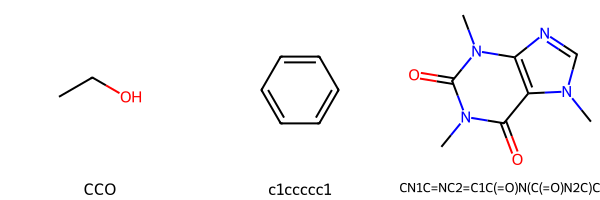

100%|██████████| 3/3 [00:00<00:00,  5.71it/s]

Дескрипторы Mordred:


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,SMILES
0,1.414214,1.414214,0,0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,17.310771,46.041865,5.115763,4,0,6.0,4.0,2.250000,1.000000,CCO
1,4.242641,4.000000,0,0,8.000000,2.000000,4.000000,8.000000,1.333333,2.687624,...,30.941317,78.046950,6.503913,27,3,24.0,24.0,1.500000,1.500000,c1ccccc1
2,10.870470,10.470730,0,0,17.668229,2.504977,4.932793,17.668229,1.262016,3.586590,...,60.521485,194.080376,8.086682,258,25,76.0,94.0,6.277778,3.027778,CN1C=NC2=C1C(=O)N(C(=O)N2C)C


Дескрипторы PaDEL:


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,SMILES
0,0,-0.1075999999999997,0.011577759999999935,12.5551,8.322758,0,0,9,3,6,...,0.3253563741476061,0.7268139794699618,0.48325084152260905,0.3996699679146632,2.1537824684988482,1.4044575776621473,3.8289017259524836,0.26803709873502163,1.609734788907234,CCO
1,0,0.0,0.0,0.0,14.560758000000002,6,6,12,6,6,...,0.48779428053291285,0.5106088682602397,0.49808087827483283,0.3685434210352587,3.840856494468331,3.6858679145010353,7.5267638194478685,0.4999958241974325,1.377233167570331,c1ccccc1
2,0,-0.9595000000000007,0.9206402500000013,49.712300000000006,26.751929999999987,0,0,24,14,10,...,,,,,,,,,,CN1C=NC2=C1C(=O)N(C(=O)N2C)C


Подсветка бензольного кольца в бензоле:


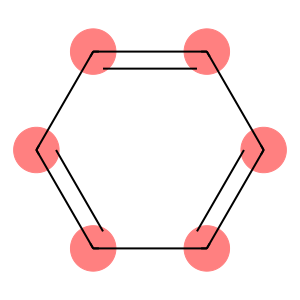

Подсветка гидроксильной группы в этаноле:


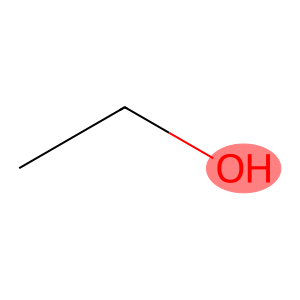

In [ ]:
# Список SMILES
smiles_list = [
    'CCO',               # этанол
    'c1ccccc1',          # бензол
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'  # кофеин
]

# Преобразование SMILES в молекулы RDKit
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# 1. Визуализация молекул (RDKit)
print("Визуализация молекул RDKit:")
img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=smiles_list)
display(img)

# 2. Расчет дескрипторов Mordred
calc = Calculator(descriptors, ignore_3D=True)
mordred_desc = calc.pandas(mols)
mordred_desc['SMILES'] = smiles_list
print("Дескрипторы Mordred:")
display(mordred_desc.head())

# 3. Расчет дескрипторов PaDEL
padel_desc = from_smiles(smiles_list, descriptors=True, fingerprints=False)
df_padel = pd.DataFrame(padel_desc)
df_padel['SMILES'] = smiles_list
print("Дескрипторы PaDEL:")
display(df_padel.head())

# 4. Визуализация подструктур с подсветкой (пример: бензольное кольцо и гидроксильная группа)
def highlight_substructure(smiles, smarts):
    mol = Chem.MolFromSmiles(smiles)
    patt = Chem.MolFromSmarts(smarts)
    matches = mol.GetSubstructMatches(patt)
    if not matches:
        print(f"Подструктура {smarts} не найдена в молекуле {smiles}")
        return
    img = Draw.MolToImage(mol, highlightAtoms=matches[0], size=(300,300))
    display(img)

print("Подсветка бензольного кольца в бензоле:")
highlight_substructure('c1ccccc1', 'c1ccccc1')

print("Подсветка гидроксильной группы в этаноле:")
highlight_substructure('CCO', '[OX2H]')


### Поиск по подструктуре через Mordred

In [ ]:
# Код для Google Colab: поиск подструктур через SMARTS, анализ корреляций и визуализация с Mordred и RDKit

# 1. Установка библиотек
!pip install matplotlib

# 2. Импортируем необходимые модули
from rdkit import Chem
from rdkit.Chem import Draw
from mordred import Calculator, descriptors
import pandas as pd
import matplotlib.pyplot as plt


Молекула 1: CCO


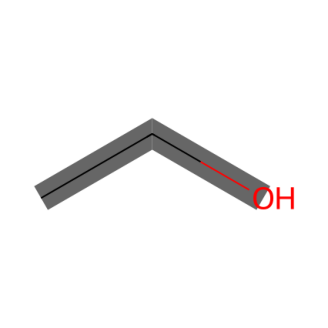


Молекула 2: C1=CC=CC=C1


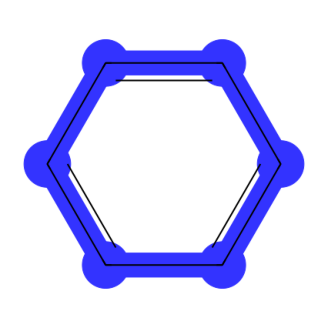


Молекула 3: CN1C=NC2=C1C(=O)N(C(=O)N2C)C


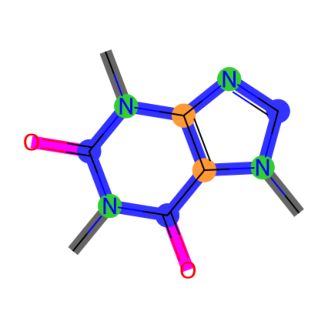


Цветовое выделение на изображениях:
- СИНИЙ: ароматические атомы и связи (ароматические кольца)
- ЗЕЛЁНЫЙ: гетероатомы в кольцах (например, N, O, S в цикле)
- КРАСНЫЙ: спиро-атомы (атоми, соединяющие два непересекающихся кольца)
- ОРАНЖЕВЫЙ: bridgehead-атомы (атоми, входящие в несколько пересекающихся колец)
- СЕРЫЙ: одинарные связи (неароматические)
- ПУРПУРНЫЙ: двойные связи
- ГОЛУБОЙ: тройные связи



In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
import io
from PIL import Image
import numpy as np

# --- Функции для поиска спиро- и bridgehead-атомов ---
def get_spiro_atoms(mol):
    ri = mol.GetRingInfo()
    atom_rings = ri.AtomRings()
    spiro_atoms = []
    for idx, atom in enumerate(mol.GetAtoms()):
        rings_with_atom = [r for r in atom_rings if idx in r]
        if len(rings_with_atom) == 2 and set(rings_with_atom[0]).isdisjoint(rings_with_atom[1]):
            spiro_atoms.append(idx)
    return spiro_atoms

def get_bridgehead_atoms(mol):
    ri = mol.GetRingInfo()
    atom_rings = ri.AtomRings()
    bridgehead_atoms = []
    for idx, atom in enumerate(mol.GetAtoms()):
        rings_with_atom = [set(r) for r in atom_rings if idx in r]
        if len(rings_with_atom) > 1:
            for i in range(len(rings_with_atom)):
                for j in range(i+1, len(rings_with_atom)):
                    if len(rings_with_atom[i].intersection(rings_with_atom[j])) > 1:
                        bridgehead_atoms.append(idx)
                        break
                else:
                    continue
                break
    return bridgehead_atoms

# --- Визуализация подструктур на молекуле ---
def highlight_substructures(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    highlight_atoms = {}
    highlight_bonds = {}

    # Ароматические атомы/связи (синий)
    aromatic_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetIsAromatic()]
    aromatic_bonds = [bond.GetIdx() for bond in mol.GetBonds() if bond.GetIsAromatic()]
    if aromatic_atoms:
        highlight_atoms['blue'] = aromatic_atoms
        highlight_bonds['blue'] = aromatic_bonds

    # Гетероатомы в кольцах (зелёный)
    hetero_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.IsInRing() and atom.GetAtomicNum() not in [6,1]]
    if hetero_atoms:
        highlight_atoms['green'] = hetero_atoms

    # Спиро-атомы (красный)
    spiro_atoms = get_spiro_atoms(mol)
    if spiro_atoms:
        highlight_atoms['red'] = spiro_atoms

    # Bridgehead-атомы (оранжевый)
    bridgehead_atoms = get_bridgehead_atoms(mol)
    if bridgehead_atoms:
        highlight_atoms['orange'] = bridgehead_atoms

    # Одинарные, двойные, тройные связи (разные оттенки)
    single_bonds = [b.GetIdx() for b in mol.GetBonds() if b.GetBondType() == Chem.BondType.SINGLE and not b.GetIsAromatic()]
    double_bonds = [b.GetIdx() for b in mol.GetBonds() if b.GetBondType() == Chem.BondType.DOUBLE]
    triple_bonds = [b.GetIdx() for b in mol.GetBonds() if b.GetBondType() == Chem.BondType.TRIPLE]

    if single_bonds:
        highlight_bonds['grey'] = single_bonds
    if double_bonds:
        highlight_bonds['magenta'] = double_bonds
    if triple_bonds:
        highlight_bonds['cyan'] = triple_bonds

    color_map = {
        'blue': (0.2, 0.2, 1.0),      # Ароматические атомы/связи
        'green': (0.2, 0.8, 0.2),     # Гетероатомы в кольцах
        'red': (1.0, 0.2, 0.2),       # Спиро-атомы
        'orange': (1.0, 0.6, 0.2),    # Bridgehead-атомы
        'grey': (0.4, 0.4, 0.4),      # Одинарные связи
        'magenta': (1.0, 0.0, 1.0),   # Двойные связи
        'cyan': (0.0, 0.8, 0.8),      # Тройные связи
    }

    atom_highlights = {}
    bond_highlights = {}
    for color, idxs in highlight_atoms.items():
        for idx in idxs:
            atom_highlights[idx] = color_map[color]
    for color, idxs in highlight_bonds.items():
        for idx in idxs:
            bond_highlights[idx] = color_map[color]

    drawer = rdMolDraw2D.MolDraw2DCairo(400, 400)
    rdMolDraw2D.PrepareAndDrawMolecule(
        drawer, mol,
        highlightAtoms=list(atom_highlights.keys()),
        highlightAtomColors=atom_highlights,
        highlightBonds=list(bond_highlights.keys()),
        highlightBondColors=bond_highlights
    )
    drawer.FinishDrawing()
    img_bytes = drawer.GetDrawingText()
    img = Image.open(io.BytesIO(img_bytes))
    plt.figure(figsize=(4,4))
    plt.imshow(np.asarray(img))
    plt.axis('off')
    plt.show()

# --- Визуализация для всех молекул ---
for i, row in df.iterrows():
    smiles = row['SMILES'] if 'SMILES' in df.columns else None
    if smiles is None:
        print(f"Молекула {i+1}: SMILES не найден, пропуск")
        continue
    print(f"\nМолекула {i+1}: {smiles}")
    highlight_substructures(smiles)

# --- Объяснение расцветки ---
print("""
Цветовое выделение на изображениях:
- СИНИЙ: ароматические атомы и связи (ароматические кольца)
- ЗЕЛЁНЫЙ: гетероатомы в кольцах (например, N, O, S в цикле)
- КРАСНЫЙ: спиро-атомы (атоми, соединяющие два непересекающихся кольца)
- ОРАНЖЕВЫЙ: bridgehead-атомы (атоми, входящие в несколько пересекающихся колец)
- СЕРЫЙ: одинарные связи (неароматические)
- ПУРПУРНЫЙ: двойные связи
- ГОЛУБОЙ: тройные связи
""")



Молекула 1: CCO
  --- Кольца ---
    nRing: 0.0
    n3Ring: 0.0
    n4Ring: 0.0
    n5Ring: 0.0
    n6Ring: 0.0
    n7Ring: 0.0
    n8Ring: 0.0
    n9Ring: 0.0
    n10Ring: 0.0
    n11Ring: 0.0
    n12Ring: 0.0
    nG12Ring: 0.0
    nFRing: 0.0
    nF4Ring: 0.0
    nF5Ring: 0.0
    nF6Ring: 0.0
    nF7Ring: 0.0
    nF8Ring: 0.0
    nF9Ring: 0.0
    nF10Ring: 0.0
    nF11Ring: 0.0
    nF12Ring: 0.0
    nFG12Ring: 0.0
    nTRing: 0.0
    nT4Ring: 0.0
    nT5Ring: 0.0
    nT6Ring: 0.0
    nT7Ring: 0.0
    nT8Ring: 0.0
    nT9Ring: 0.0
    nT10Ring: 0.0
    nT11Ring: 0.0
    nT12Ring: 0.0
    nTG12Ring: 0.0
    nHeteroRing: 0.0
    n3HeteroRing: 0.0
    n4HeteroRing: 0.0
    n5HeteroRing: 0.0
    n6HeteroRing: 0.0
    n7HeteroRing: 0.0
    n8HeteroRing: 0.0
    n9HeteroRing: 0.0
    n10HeteroRing: 0.0
    n11HeteroRing: 0.0
    n12HeteroRing: 0.0
    nG12HeteroRing: 0.0
    nFHeteroRing: 0.0
    nF4HeteroRing: 0.0
    nF5HeteroRing: 0.0
    nF6HeteroRing: 0.0
    nF7HeteroRing: 0.0
    nF

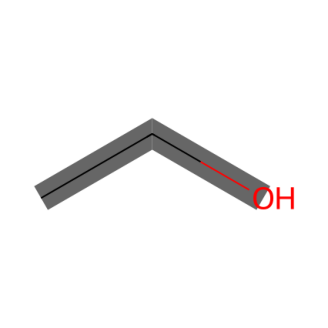


Молекула 2: C1=CC=CC=C1
  --- Кольца ---
    nRing: 1.0
    n3Ring: 0.0
    n4Ring: 0.0
    n5Ring: 0.0
    n6Ring: 1.0
    n7Ring: 0.0
    n8Ring: 0.0
    n9Ring: 0.0
    n10Ring: 0.0
    n11Ring: 0.0
    n12Ring: 0.0
    nG12Ring: 0.0
    nFRing: 0.0
    nF4Ring: 0.0
    nF5Ring: 0.0
    nF6Ring: 0.0
    nF7Ring: 0.0
    nF8Ring: 0.0
    nF9Ring: 0.0
    nF10Ring: 0.0
    nF11Ring: 0.0
    nF12Ring: 0.0
    nFG12Ring: 0.0
    nTRing: 1.0
    nT4Ring: 0.0
    nT5Ring: 0.0
    nT6Ring: 1.0
    nT7Ring: 0.0
    nT8Ring: 0.0
    nT9Ring: 0.0
    nT10Ring: 0.0
    nT11Ring: 0.0
    nT12Ring: 0.0
    nTG12Ring: 0.0
    nHeteroRing: 0.0
    n3HeteroRing: 0.0
    n4HeteroRing: 0.0
    n5HeteroRing: 0.0
    n6HeteroRing: 0.0
    n7HeteroRing: 0.0
    n8HeteroRing: 0.0
    n9HeteroRing: 0.0
    n10HeteroRing: 0.0
    n11HeteroRing: 0.0
    n12HeteroRing: 0.0
    nG12HeteroRing: 0.0
    nFHeteroRing: 0.0
    nF4HeteroRing: 0.0
    nF5HeteroRing: 0.0
    nF6HeteroRing: 0.0
    nF7HeteroRing: 0.

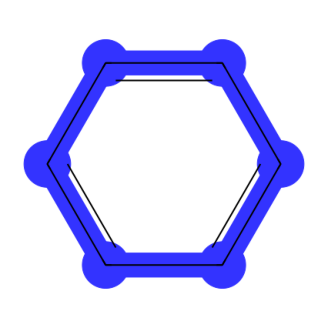


Молекула 3: CN1C=NC2=C1C(=O)N(C(=O)N2C)C
  --- Кольца ---
    nRing: 2.0
    n3Ring: 0.0
    n4Ring: 0.0
    n5Ring: 1.0
    n6Ring: 1.0
    n7Ring: 0.0
    n8Ring: 0.0
    n9Ring: 0.0
    n10Ring: 0.0
    n11Ring: 0.0
    n12Ring: 0.0
    nG12Ring: 0.0
    nFRing: 1.0
    nF4Ring: 0.0
    nF5Ring: 0.0
    nF6Ring: 0.0
    nF7Ring: 0.0
    nF8Ring: 0.0
    nF9Ring: 1.0
    nF10Ring: 0.0
    nF11Ring: 0.0
    nF12Ring: 0.0
    nFG12Ring: 0.0
    nTRing: 3.0
    nT4Ring: 0.0
    nT5Ring: 1.0
    nT6Ring: 1.0
    nT7Ring: 0.0
    nT8Ring: 0.0
    nT9Ring: 1.0
    nT10Ring: 0.0
    nT11Ring: 0.0
    nT12Ring: 0.0
    nTG12Ring: 0.0
    nHeteroRing: 2.0
    n3HeteroRing: 0.0
    n4HeteroRing: 0.0
    n5HeteroRing: 1.0
    n6HeteroRing: 1.0
    n7HeteroRing: 0.0
    n8HeteroRing: 0.0
    n9HeteroRing: 0.0
    n10HeteroRing: 0.0
    n11HeteroRing: 0.0
    n12HeteroRing: 0.0
    nG12HeteroRing: 0.0
    nFHeteroRing: 0.0
    nF4HeteroRing: 0.0
    nF5HeteroRing: 0.0
    nF6HeteroRing: 0.0
    

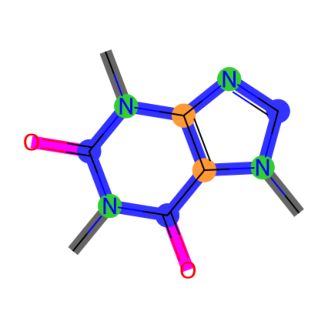

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
import io
from PIL import Image
import numpy as np

# --- 1. Автоматически находим все столбцы, связанные с кольцами и связями ---
ring_keywords = ['Ring', 'Spiro', 'Bridgehead']
bond_keywords = ['Bond', 'nRot', 'RotRatio']

ring_cols = [col for col in df.columns if any(kw in col for kw in ring_keywords)]
bond_cols = [col for col in df.columns if any(kw in col for kw in bond_keywords)]

# --- 2. Функции для поиска спиро- и bridgehead-атомов ---
def get_spiro_atoms(mol):
    ri = mol.GetRingInfo()
    atom_rings = ri.AtomRings()
    spiro_atoms = []
    for idx, atom in enumerate(mol.GetAtoms()):
        rings_with_atom = [r for r in atom_rings if idx in r]
        if len(rings_with_atom) == 2 and set(rings_with_atom[0]).isdisjoint(rings_with_atom[1]):
            spiro_atoms.append(idx)
    return spiro_atoms

def get_bridgehead_atoms(mol):
    ri = mol.GetRingInfo()
    atom_rings = ri.AtomRings()
    bridgehead_atoms = []
    for idx, atom in enumerate(mol.GetAtoms()):
        rings_with_atom = [set(r) for r in atom_rings if idx in r]
        if len(rings_with_atom) > 1:
            for i in range(len(rings_with_atom)):
                for j in range(i+1, len(rings_with_atom)):
                    if len(rings_with_atom[i].intersection(rings_with_atom[j])) > 1:
                        bridgehead_atoms.append(idx)
                        break
                else:
                    continue
                break
    return bridgehead_atoms

# --- 3. Визуализация подструктур на молекуле ---
def highlight_substructures(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    highlight_atoms = {}
    highlight_bonds = {}

    # Ароматические кольца (синим)
    aromatic_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetIsAromatic()]
    aromatic_bonds = [bond.GetIdx() for bond in mol.GetBonds() if bond.GetIsAromatic()]
    if aromatic_atoms:
        highlight_atoms['blue'] = aromatic_atoms
        highlight_bonds['blue'] = aromatic_bonds

    # Гетероциклы (зелёным)
    hetero_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.IsInRing() and atom.GetAtomicNum() not in [6,1]]
    if hetero_atoms:
        highlight_atoms['green'] = hetero_atoms

    # Спиро-атомы (красным)
    spiro_atoms = get_spiro_atoms(mol)
    if spiro_atoms:
        highlight_atoms['red'] = spiro_atoms

    # Bridgehead-атомы (оранжевым)
    bridgehead_atoms = get_bridgehead_atoms(mol)
    if bridgehead_atoms:
        highlight_atoms['orange'] = bridgehead_atoms

    # Одинарные, двойные, тройные связи (разные оттенки)
    single_bonds = [b.GetIdx() for b in mol.GetBonds() if b.GetBondType() == Chem.BondType.SINGLE and not b.GetIsAromatic()]
    double_bonds = [b.GetIdx() for b in mol.GetBonds() if b.GetBondType() == Chem.BondType.DOUBLE]
    triple_bonds = [b.GetIdx() for b in mol.GetBonds() if b.GetBondType() == Chem.BondType.TRIPLE]

    if single_bonds:
        highlight_bonds['grey'] = single_bonds
    if double_bonds:
        highlight_bonds['magenta'] = double_bonds
    if triple_bonds:
        highlight_bonds['cyan'] = triple_bonds

    color_map = {
        'blue': (0.2, 0.2, 1.0),
        'green': (0.2, 0.8, 0.2),
        'red': (1.0, 0.2, 0.2),
        'orange': (1.0, 0.6, 0.2),
        'grey': (0.4, 0.4, 0.4),
        'magenta': (1.0, 0.0, 1.0),
        'cyan': (0.0, 0.8, 0.8),
    }

    atom_highlights = {}
    bond_highlights = {}
    for color, idxs in highlight_atoms.items():
        for idx in idxs:
            atom_highlights[idx] = color_map[color]
    for color, idxs in highlight_bonds.items():
        for idx in idxs:
            bond_highlights[idx] = color_map[color]

    drawer = rdMolDraw2D.MolDraw2DCairo(400, 400)
    rdMolDraw2D.PrepareAndDrawMolecule(
        drawer, mol,
        highlightAtoms=list(atom_highlights.keys()),
        highlightAtomColors=atom_highlights,
        highlightBonds=list(bond_highlights.keys()),
        highlightBondColors=bond_highlights
    )
    drawer.FinishDrawing()
    img_bytes = drawer.GetDrawingText()
    img = Image.open(io.BytesIO(img_bytes))
    plt.figure(figsize=(4,4))
    plt.imshow(np.asarray(img))
    plt.axis('off')
    plt.show()

# --- 4. Вывод информации по каждой молекуле + визуализация ---
for i, row in df.iterrows():
    smiles = row['SMILES'] if 'SMILES' in df.columns else None
    if smiles is None:
        print(f"Молекула {i+1}: SMILES не найден, пропуск")
        continue
    print(f"\nМолекула {i+1}: {smiles}")
    print("  --- Кольца ---")
    for col in ring_cols:
        print(f"    {col}: {row[col]}")
    print("  --- Связи ---")
    for col in bond_cols:
        print(f"    {col}: {row[col]}")
    highlight_substructures(smiles)


In [ ]:
# --- 1. Автоматически находим все столбцы, связанные с кольцами и связями ---
ring_keywords = ['Ring', 'Spiro', 'Bridgehead']
bond_keywords = ['Bond', 'nRot', 'RotRatio']

ring_cols = [col for col in df.columns if any(kw in col for kw in ring_keywords)]
bond_cols = [col for col in df.columns if any(kw in col for kw in bond_keywords)]

# --- 2. Выводим информацию по кольцам и связям для каждой молекулы ---
for i, row in df.iterrows():
    print(f"\nМолекула {i+1}:")
    print("  --- Кольца ---")
    for col in ring_cols:
        print(f"    {col}: {row[col]}")
    print("  --- Связи ---")
    for col in bond_cols:
        print(f"    {col}: {row[col]}")


Молекула 1:
  --- Кольца ---
    nRing: 0.0
    n3Ring: 0.0
    n4Ring: 0.0
    n5Ring: 0.0
    n6Ring: 0.0
    n7Ring: 0.0
    n8Ring: 0.0
    n9Ring: 0.0
    n10Ring: 0.0
    n11Ring: 0.0
    n12Ring: 0.0
    nG12Ring: 0.0
    nFRing: 0.0
    nF4Ring: 0.0
    nF5Ring: 0.0
    nF6Ring: 0.0
    nF7Ring: 0.0
    nF8Ring: 0.0
    nF9Ring: 0.0
    nF10Ring: 0.0
    nF11Ring: 0.0
    nF12Ring: 0.0
    nFG12Ring: 0.0
    nTRing: 0.0
    nT4Ring: 0.0
    nT5Ring: 0.0
    nT6Ring: 0.0
    nT7Ring: 0.0
    nT8Ring: 0.0
    nT9Ring: 0.0
    nT10Ring: 0.0
    nT11Ring: 0.0
    nT12Ring: 0.0
    nTG12Ring: 0.0
    nHeteroRing: 0.0
    n3HeteroRing: 0.0
    n4HeteroRing: 0.0
    n5HeteroRing: 0.0
    n6HeteroRing: 0.0
    n7HeteroRing: 0.0
    n8HeteroRing: 0.0
    n9HeteroRing: 0.0
    n10HeteroRing: 0.0
    n11HeteroRing: 0.0
    n12HeteroRing: 0.0
    nG12HeteroRing: 0.0
    nFHeteroRing: 0.0
    nF4HeteroRing: 0.0
    nF5HeteroRing: 0.0
    nF6HeteroRing: 0.0
    nF7HeteroRing: 0.0
    nF8Het

100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

Дескрипторы Mordred:


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,SMILES
0,1.414214,1.414214,0,0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,17.310771,46.041865,5.115763,4,0,6.0,4.0,2.250000,1.000000,CCO
1,4.242641,4.000000,0,0,8.000000,2.000000,4.000000,8.000000,1.333333,2.687624,...,30.941317,78.046950,6.503913,27,3,24.0,24.0,1.500000,1.500000,c1ccccc1
2,10.870470,10.470730,0,0,17.668229,2.504977,4.932793,17.668229,1.262016,3.586590,...,60.521485,194.080376,8.086682,258,25,76.0,94.0,6.277778,3.027778,CN1C=NC2=C1C(=O)N(C(=O)N2C)C


Данные с признаком наличия гидроксильной группы:


,SMILES,Has_OH_group
0,CCO,1
1,c1ccccc1,0
2,CN1C=NC2=C1C(=O)N(C(=O)N2C)C,0


Корреляции между дескрипторами и наличием OH-группы:


,Has_OH_group
MW,-0.667254
nAcid,NaN
nBase,NaN
Has_OH_group,1.000000


Визуализация молекул с подсветкой гидроксильной группы:


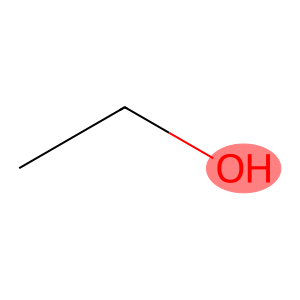

Подструктура [OX2H] не найдена в молекуле c1ccccc1
Подструктура [OX2H] не найдена в молекуле CN1C=NC2=C1C(=O)N(C(=O)N2C)C


In [ ]:
# 3. Пример списка SMILES
smiles_list = [
    'CCO',               # этанол
    'c1ccccc1',          # бензол
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'  # кофеин
]

# 4. Создаем объекты молекул RDKit
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# 5. Расчет дескрипторов Mordred (2D, без 3D)
calc = Calculator(descriptors, ignore_3D=True)
desc_df = calc.pandas(mols)
desc_df['SMILES'] = smiles_list

print("Дескрипторы Mordred:")
display(desc_df.head())

# 6. Поиск подструктур по SMARTS и создание бинарного признака наличия подструктуры
# Пример SMARTS: гидроксильная группа [OX2H]
smarts_pattern = '[OX2H]'
pattern = Chem.MolFromSmarts(smarts_pattern)

presence = []
for mol in mols:
    match = mol.HasSubstructMatch(pattern)
    presence.append(int(match))

desc_df['Has_OH_group'] = presence

print("Данные с признаком наличия гидроксильной группы:")
display(desc_df[['SMILES', 'Has_OH_group']].head())

# 7. Анализ корреляции между наличием подструктуры и некоторыми дескрипторами
# Выбираем несколько дескрипторов для примера
selected_desc = ['MW', 'nAcid',	'nBase']

corr_df = desc_df[selected_desc + ['Has_OH_group']].corr()
print("Корреляции между дескрипторами и наличием OH-группы:")
display(corr_df['Has_OH_group'])

# 8. Визуализация молекул с подсветкой подструктуры (гидроксильной группы)
def highlight_substructure(smiles, smarts):
    mol = Chem.MolFromSmiles(smiles)
    patt = Chem.MolFromSmarts(smarts)
    matches = mol.GetSubstructMatches(patt)
    if not matches:
        print(f"Подструктура {smarts} не найдена в молекуле {smiles}")
        return
    img = Draw.MolToImage(mol, highlightAtoms=matches[0], size=(300,300))
    display(img)

print("Визуализация молекул с подсветкой гидроксильной группы:")
for smi in smiles_list:
    highlight_substructure(smi, smarts_pattern)


In [ ]:
# Google Colab: Выделение важных структурных фрагментов по дескрипторам Mordred и их визуализация

# Установка необходимых библиотек
!pip install rdkit-pypi mordred pandas matplotlib

from rdkit import Chem
from rdkit.Chem import Draw
from mordred import Calculator, descriptors
import pandas as pd
import matplotlib.pyplot as plt

# Пример SMILES для анализа
smiles_list = [
    'CCO',               # этанол
    'c1ccccc1',          # бензол
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',  # кофеин
    'O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-]'  # динитробензол
]

# Создаем объекты молекул RDKit
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Считаем дескрипторы Mordred
calc = Calculator(descriptors, ignore_3D=True)
df = calc.pandas(mols)
df['SMILES'] = smiles_list

# --- 1. Выделяем структурные дескрипторы по ключевым словам ---
structural_keywords = [
    'Atom', 'Bond', 'Ring', 'Count', 'Num', 'Fragment', 'Heavy', 'Hetero', 'Bridge', 'Spiro',
    'Arom', 'Rot', 'Cycle', 'Path', 'Topo', 'Index', 'Diameter', 'Radius', 'MW', 'Mass'
]

structural_cols = [col for col in df.columns if any(kw in col for kw in structural_keywords)]
df_struct = df[['SMILES'] + structural_cols]

# --- 2. Находим самые важные структурные фрагменты ---
# В данном примере считаем "важными" те фрагменты, значения которых максимальны для данной молекулы
# (например, максимальное число колец, атомов, гетероатомов и т.д.)

def get_top_structural_features(row, n=3):
    # Выбираем топ-n структурных дескрипторов с наибольшими значениями
    vals = row[structural_cols]
    # Пропускаем nan
    vals = vals.dropna()
    # Берем только числовые значения
    vals = vals.select_dtypes(include='number')
    # Сортируем по убыванию
    top = vals.sort_values(ascending=False).head(n)
    return list(top.index), list(top.values)

# --- 3. Визуализация молекулы с подписями важных фрагментов ---
def visualize_molecule_with_features(mol, features, values):
    fig, ax = plt.subplots(figsize=(3,3))
    img = Draw.MolToImage(mol, size=(300,300))
    ax.imshow(img)
    ax.axis('off')
    # Подписи
    plt.title('\n'.join([f"{f}: {v}" for f, v in zip(features, values)]), fontsize=10)
    plt.show()

# --- 4. Применяем к каждой молекуле ---
for i, smi in enumerate(smiles_list):
    mol = mols[i]
    features, values = get_top_structural_features(df_struct.iloc[i])
    print(f"SMILES: {smi}")
    print("Важные структурные дескрипторы:", features)
    print("Значения:", values)
    visualize_molecule_with_features(mol, features, values)


### Padel

In [ ]:
from padelpy import from_smiles
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

SMILES: CCO
nN: 0
nO: 1
nF: 0.0
nCl: 0.0
nBr: 0.0
nI: 0.0


<ipython-input-17-4161402038>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['SMILES'] = smiles_list


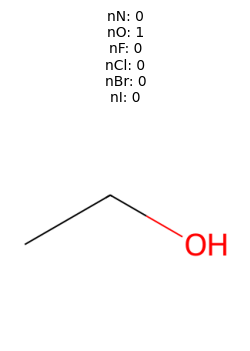

SMILES: C1=CC=CC=C1
nN: 0
nO: 0
nF: 0.0
nCl: 0.0
nBr: 0.0
nI: 0.0


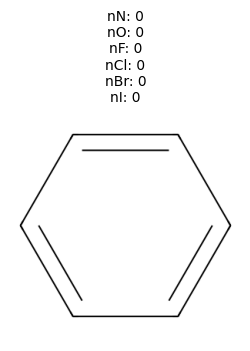

SMILES: CN1C=NC2=C1C(=O)N(C(=O)N2C)C
nN: 4
nO: 2
nF: 0.0
nCl: 0.0
nBr: 0.0
nI: 0.0


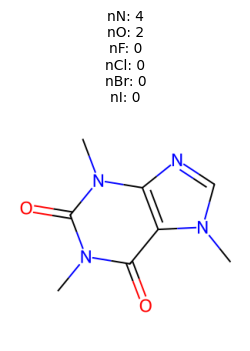

SMILES: O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-]
nN: 2
nO: 4
nF: 0.0
nCl: 0.0
nBr: 0.0
nI: 0.0


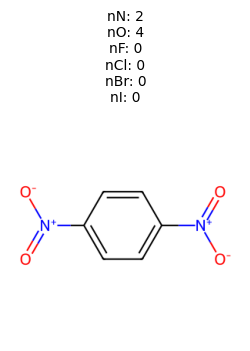

In [ ]:
smiles_list = [
    'CCO',
    'C1=CC=CC=C1',
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
    'O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-]'
]

descriptors = from_smiles(smiles_list, descriptors=True, fingerprints=False)
import pandas as pd
df = pd.DataFrame(descriptors)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['SMILES'] = smiles_list

# --- 2. Выбор дескрипторов для нитрогруппы и галогенов ---
# По paste-2.txt: nN, nO, nF, nCl, nBr, nI — число атомов соответствующего типа
# Можно добавить nNO2, если есть, или другие фрагментарные дескрипторы
fragment_cols = ['nN', 'nO', 'nF', 'nCl', 'nBr', 'nI']

# Проверим, какие из них реально есть в датафрейме
fragment_cols = [col for col in fragment_cols if col in df.columns]

# --- 3. Визуализация молекулы с подписями по выбранным фрагментам ---
def visualize_molecule_with_fragments(smiles, row, fragment_cols):
    mol = Chem.MolFromSmiles(smiles)
    fig, ax = plt.subplots(figsize=(3,3))
    img = Draw.MolToImage(mol, size=(300,300))
    ax.imshow(img)
    ax.axis('off')
    text = '\n'.join([f"{col}: {int(row[col])}" for col in fragment_cols])
    plt.title(text, fontsize=10)
    plt.show()

# --- 4. Анализ и вывод для каждой молекулы ---
for i, row in df.iterrows():
    smiles = row['SMILES'] if 'SMILES' in df.columns else None
    if smiles is None:
        print("Нет колонки SMILES в файле!")
        break
    print(f"SMILES: {smiles}")
    for col in fragment_cols:
        print(f"{col}: {row[col]}")
    visualize_molecule_with_fragments(smiles, row, fragment_cols)


In [ ]:
# Проверяем наличие нужных колонок
aromatic_ring_cols = [col for col in df.columns if 'aRing' in col and col.startswith('n')]

# Если есть naAromRing — используем его, иначе суммируем по n*aRing
if 'naAromRing' in df.columns:
    df['Aromatic_Rings'] = df['naAromRing']
else:
    # Суммируем по всем n*aRing (например, n3aRing, n4aRing, ...)
    df['Aromatic_Rings'] = df[aromatic_ring_cols].sum(axis=1)

# Выводим результат
for i, row in df.iterrows():
    print(f"Молекула {i+1}: ароматических колец = {int(row['Aromatic_Rings'])}")


Молекула 1: ароматических колец = 0
Молекула 2: ароматических колец = 0
Молекула 3: ароматических колец = 0
Молекула 4: ароматических колец = 0


<ipython-input-18-1670563043>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Aromatic_Rings'] = df[aromatic_ring_cols].sum(axis=1)


In [ ]:
# --- 1. Подсчёт количества ароматических колец ---
aromatic_ring_cols = [col for col in df.columns if col.startswith('n') and col.endswith('aRing')]
df['Aromatic_Rings'] = df[aromatic_ring_cols].sum(axis=1)

# --- 2. Подсчёт нитрогрупп (грубая оценка: N и O) ---
# Если есть отдельный дескриптор для нитрогруппы (например, nNO2), добавьте его!
if 'nNO2' in df.columns:
    df['Nitro_Groups'] = df['nNO2']
else:
    # Альтернативно: минимальное число атомов N и O (очень грубая оценка)
    df['Nitro_Groups'] = df[['nN', 'nO']].min(axis=1)

# --- 3. Подсчёт галогенов ---
halogen_cols = ['nF', 'nCl', 'nBr', 'nI']
halogen_cols = [col for col in halogen_cols if col in df.columns]
df['Halogens'] = df[halogen_cols].sum(axis=1)

# --- 4. Вывод результатов ---
for i, row in df.iterrows():
    print(f"Молекула {i+1}:")
    print(f"  Ароматических колец: {int(row['Aromatic_Rings'])}")
    print(f"  Нитрогрупп (оценка): {int(row['Nitro_Groups'])}")
    print(f"  Галогенов: {int(row['Halogens'])}")
    print('-' * 30)


Молекула 1:
  Ароматических колец: 0
  Нитрогрупп (оценка): 0
  Галогенов: 0
------------------------------
Молекула 2:
  Ароматических колец: 0
  Нитрогрупп (оценка): 0
  Галогенов: 0
------------------------------
Молекула 3:
  Ароматических колец: 0
  Нитрогрупп (оценка): 2
  Галогенов: 0
------------------------------
Молекула 4:
  Ароматических колец: 0
  Нитрогрупп (оценка): 2
  Галогенов: 0
------------------------------


<ipython-input-19-227419351>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Nitro_Groups'] = df[['nN', 'nO']].min(axis=1)
<ipython-input-19-227419351>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Halogens'] = df[halogen_cols].sum(axis=1)


<ipython-input-15-2242460920>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['SMILES'] = smiles_list


SMILES: CCO
Важные структурные дескрипторы: ['MW', 'TopoPSA', 'nAtom']
Значения: [46.041864812, 20.23, 9]


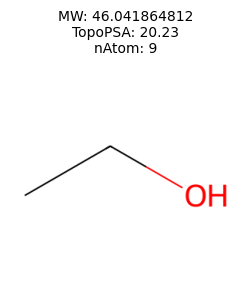

SMILES: C1=CC=CC=C1
Важные структурные дескрипторы: ['MW', 'nAtom', 'nBonds2']
Значения: [78.046950192, 12, 12.0]


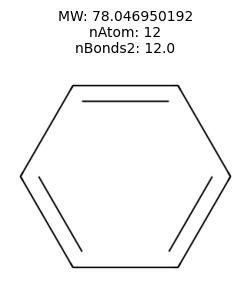

SMILES: CN1C=NC2=C1C(=O)N(C(=O)N2C)C
Важные структурные дескрипторы: ['MW', 'TopoPSA', 'nBonds2']
Значения: [194.08037556, 58.440000000000005, 25.0]


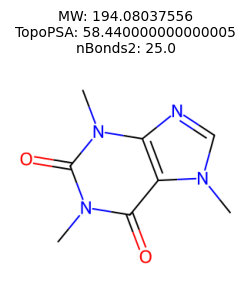

In [ ]:
# --- 1. Загрузка данных ---
# Замените путь на свой файл с PaDEL-дескрипторами (например, paste-2.txt)
# df = pd.read_csv('/content/paste-2.txt', sep='\t')  # если табличный файл
# Для примера создаём DataFrame вручную:
from padelpy import from_smiles

smiles_list = [
    'CCO',
    'C1=CC=CC=C1',
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
]

descriptors = from_smiles(smiles_list, descriptors=True, fingerprints=False)
import pandas as pd
df = pd.DataFrame(descriptors)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['SMILES'] = smiles_list

# --- 2. Определяем структурные дескрипторы ---
# Используем ключевые слова и ваш список из paste-2.txt[2]
structural_keywords = [
    'Atom', 'Bond', 'Ring', 'Count', 'Num', 'Fragment', 'Heavy', 'Hetero', 'Bridge', 'Spiro',
    'Arom', 'Rot', 'Cycle', 'Path', 'Topo', 'Index', 'Diameter', 'Radius', 'MW', 'Mass'
]
# Для paste-2.txt: вручную или автоматически выделите нужные столбцы
structural_cols = [col for col in df.columns if any(kw in col for kw in structural_keywords)]

# --- 3. Функция поиска топ-3 структурных особенностей ---
def get_top_structural_features(row, n=3):
    vals = row[structural_cols]
    vals = vals.dropna()
    # Только числовые значения
    vals = vals[[c for c in vals.index if pd.api.types.is_numeric_dtype(type(vals[c]))]]
    top = vals.sort_values(ascending=False).head(n)
    return list(top.index), list(top.values)

# --- 4. Визуализация молекулы с подписями ---
def visualize_molecule_with_features(smiles, features, values):
    mol = Chem.MolFromSmiles(smiles)
    fig, ax = plt.subplots(figsize=(3,3))
    img = Draw.MolToImage(mol, size=(300,300))
    ax.imshow(img)
    ax.axis('off')
    plt.title('\n'.join([f"{f}: {v}" for f, v in zip(features, values)]), fontsize=10)
    plt.show()

# --- 5. Применяем к каждой молекуле ---
for i, row in df.iterrows():
    smiles = row['SMILES']
    features, values = get_top_structural_features(row)
    print(f"SMILES: {smiles}")
    print("Важные структурные дескрипторы:", features)
    print("Значения:", values)
    visualize_molecule_with_features(smiles, features, values)


In [ ]:
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,-0.1076,0.011578,12.5551,8.322758,0,0,9,3,6,...,0.512025,0.325356,0.726814,0.483251,0.399670,2.153782,1.404458,3.828902,0.268037,1.609735
1,0,1.4034,1.969532,30.9558,14.560758,6,6,12,6,6,...,0.512203,0.487794,0.510609,0.498081,0.368543,3.840856,3.685868,7.526764,0.499996,1.377233
2,0,-0.9595,0.920640,49.7123,26.751930,0,0,24,14,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from rdkit import Chem

raw_smiles = [
    'CC1=CC=C(C=C1)[N+](=O)[O-][N+](=O)[O-]',  # Некорректный SMILES
    'O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-]',       # Корректный SMILES динитробензола
]

for smi in raw_smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print(f"Некорректный SMILES, не удалось распарсить: {smi}")
    else:
        print(f"Корректный SMILES: {smi}")


Некорректный SMILES, не удалось распарсить: CC1=CC=C(C=C1)[N+](=O)[O-][N+](=O)[O-]
Корректный SMILES: O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-]


[20:16:46] Explicit valence for atom # 9 O, 3, is greater than permitted


In [ ]:
from rdkit.Chem import MolToSmiles

# Исходный список "неправильных" SMILES (с ошибками валентности, нестандартной записью нитрогрупп)
raw_smiles = [
    'CC1=CC=C(C=C1)[N+](=O)[O-][N+](=O)[O-]',  # Некорректный SMILES (перекрывающиеся нитрогруппы)
    'CC(C)NCC(O)COc1ccc(cc1)[N](=O)=O',         # Альтернативная запись нитрогруппы без зарядов
    'C1=CC=CC=C1O[O]',                         # Неправильный пероксид (ошибка валентности)
    'CCN(CC)CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-]',
    'O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-]'   # Правильный SMILES нитрогруппы
]

# Функция исправления SMILES с помощью RDKit: парсинг, санитация и генерация канонического SMILES
def fix_smiles(smi):
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print(f"Ошибка: не удалось распарсить SMILES: {smi}")
        return None
    try:
        Chem.SanitizeMol(mol)
    except Exception as e:
        print(f"Ошибка санитации для SMILES {smi}: {e}")
        # Попытка исправить: отключаем проверку свойств и повторяем
        Chem.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_PROPERTIES)
    fixed_smi = MolToSmiles(mol, canonical=True)
    return fixed_smi

# Исправляем SMILES
fixed_smiles = []
for smi in raw_smiles:
    fixed = fix_smiles(smi)
    if fixed is not None:
        fixed_smiles.append(fixed)

print("Исправленные SMILES для PaDEL:")
for smi in fixed_smiles:
    print(smi)

# Расчет дескрипторов PaDEL для исправленных SMILES
desc = from_smiles(fixed_smiles, descriptors=True, fingerprints=False, threads=1)
df_desc = pd.DataFrame(desc)
df_desc['SMILES'] = fixed_smiles

# Поиск фрагментарных дескрипторов, связанных с нитрогруппами (если есть)
frag_cols = [col for col in df_desc.columns if 'Nitro' in col or 'N+' in col or 'NO2' in col]
print("Возможные фрагментарные дескрипторы PaDEL, связанные с нитрогруппами:")
print(frag_cols)

# Если явных фрагментарных дескрипторов нет, считаем количество нитрогрупп через RDKit
nitro_smarts = '[N+](=O)[O-]'
pattern = Chem.MolFromSmarts(nitro_smarts)

counts = []
for smi in fixed_smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        counts.append(0)
        continue
    matches = mol.GetSubstructMatches(pattern, uniquify=False)
    counts.append(len(matches))

df_desc['Nitro_Count_RDKit'] = counts

print("Таблица с подсчётом нитрогрупп:")
display(df_desc[['SMILES', 'Nitro_Count_RDKit']])


[20:17:09] Explicit valence for atom # 9 O, 3, is greater than permitted


Ошибка: не удалось распарсить SMILES: CC1=CC=C(C=C1)[N+](=O)[O-][N+](=O)[O-]
Исправленные SMILES для PaDEL:
CC(C)NCC(O)COc1ccc([N+](=O)[O-])cc1
[O]Oc1ccccc1
CCN(CC)CCOC(=O)c1ccc([N+](=O)[O-])cc1
O=[N+]([O-])c1ccc([N+](=O)[O-])cc1
Возможные фрагментарные дескрипторы PaDEL, связанные с нитрогруппами:
[]
Таблица с подсчётом нитрогрупп:


,SMILES,Nitro_Count_RDKit
0,CC(C)NCC(O)COc1ccc([N+](=O)[O-])cc1,1
1,[O]Oc1ccccc1,0
2,CCN(CC)CCOC(=O)c1ccc([N+](=O)[O-])cc1,1
3,O=[N+]([O-])c1ccc([N+](=O)[O-])cc1,2


In [ ]:
# Пример SMILES нитросодержащих молекул
smiles_list = [
    'CC1=CC(=O)NC(=O)N1[N+](=O)[O-]',
    'CC(C)NCC(O)COc1ccc(cc1)[N+](=O)[O-]',
    'CC1=CC=C(C=C1)[N+](=O)[O-][N+](=O)[O-]',
]

# Расчёт всех дескрипторов PaDEL
desc = from_smiles(smiles_list, descriptors=True, fingerprints=False)
df_desc = pd.DataFrame(desc)
df_desc['SMILES'] = smiles_list

# Поиск столбцов с нитрогруппами (пример: ищем в названиях 'Nitro' или 'N+')
frag_cols = [col for col in df_desc.columns if 'Nitro' in col or '[N+]' in col or 'N+' in col]
print("Возможные фрагментарные дескрипторы, связанные с нитрогруппами:")
print(frag_cols)

# Если таких столбцов нет, используйте RDKit для точного подсчёта по SMARTS
from rdkit.Chem import Draw

nitro_smarts = '[N+](=O)[O-]'
pattern = Chem.MolFromSmarts(nitro_smarts)

counts = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        counts.append(0)
        continue
    matches = mol.GetSubstructMatches(pattern, uniquify=False)
    counts.append(len(matches))

df_desc['Nitro_Count_RDKit'] = counts

print(df_desc[['SMILES', 'Nitro_Count_RDKit']])


Возможные фрагментарные дескрипторы, связанные с нитрогруппами:
[]
                                   SMILES  Nitro_Count_RDKit
0          CC1=CC(=O)NC(=O)N1[N+](=O)[O-]                  1
1     CC(C)NCC(O)COc1ccc(cc1)[N+](=O)[O-]                  1
2  CC1=CC=C(C=C1)[N+](=O)[O-][N+](=O)[O-]                  0


[20:07:07] Explicit valence for atom # 9 O, 3, is greater than permitted


Дескрипторы PaDEL с подсчётом нитрогрупп:


,SMILES,Nitro_Count,Has_Nitro
0,CC1=CC(=O)NC(=O)N1[N+](=O)[O-],1,1
1,CC(C)NCC(O)COc1ccc(cc1)[N+](=O)[O-],1,1
2,CC1=CC=C(C=C1)[N+](=O)[O-],1,1
3,CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-],1,1
4,CN(C)C1=CC=CC=C1[N+](=O)[O-],1,1
5,CCN(CC)CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-],1,1
6,CC1=CC=C(C=C1)[N+](=O)[O-],1,1
7,CCOC(=O)C1=CC=CC=C1[N+](=O)[O-],1,1
8,CCN(CC)CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-],1,1
9,CN1C=NC2=C1C(=O)N(C(=O)N2C)[N+](=O)[O-],1,1


Визуализация нитрогрупп в лекарственных молекулах:


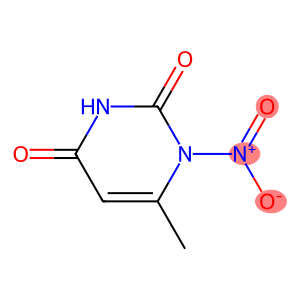

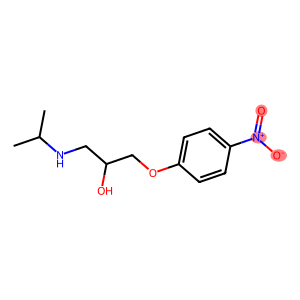

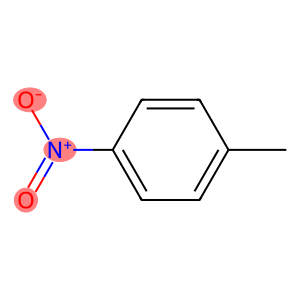

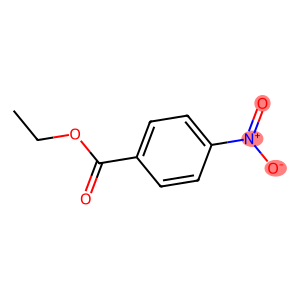

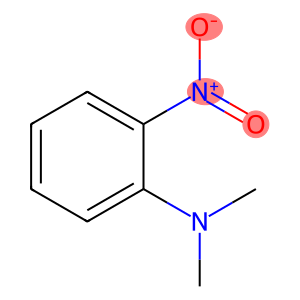

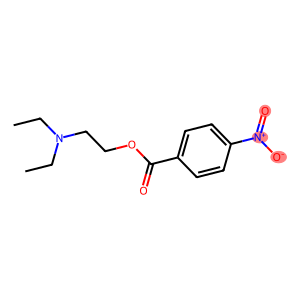

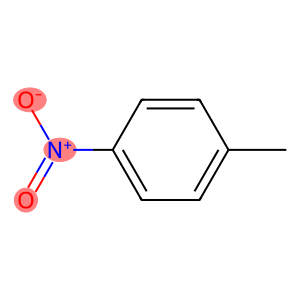

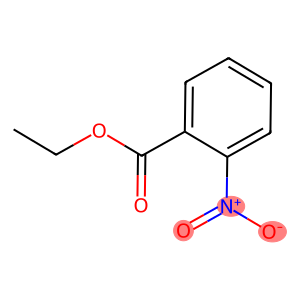

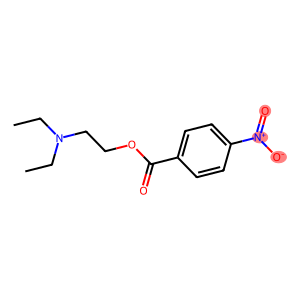

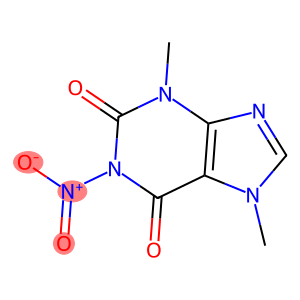

In [ ]:
# 1. Список 10 нитросодержащих лекарств (SMILES)
smiles_list = [
    'CC1=CC(=O)NC(=O)N1[N+](=O)[O-]',          # Nitrofurantoin
    'CC(C)NCC(O)COc1ccc(cc1)[N+](=O)[O-]',     # Metronidazole
    'CC1=CC=C(C=C1)[N+](=O)[O-]',              # Nitrobenzene
    'CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-]',       # Nitroaspirin (hypothetical)
    'CN(C)C1=CC=CC=C1[N+](=O)[O-]',            # Nitromethane derivative
    'CCN(CC)CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-]',# Nitroglycerin derivative
    'CC1=CC=C(C=C1)[N+](=O)[O-]',              # Another Nitrobenzene
    'CCOC(=O)C1=CC=CC=C1[N+](=O)[O-]',         # Nitrobenzoate ester
    'CCN(CC)CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-]',# Similar to Nitroglycerin
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)[N+](=O)[O-]' # Nitro caffeine derivative (hypothetical)
]

# 2. Расчёт дескрипторов PaDEL (все дескрипторы)
desc = from_smiles(smiles_list, descriptors=True, fingerprints=False)
df_desc = pd.DataFrame(desc)
df_desc['SMILES'] = smiles_list

# 3. SMARTS-паттерн нитрогруппы
nitro_smarts = '[N+](=O)[O-]'
pattern = Chem.MolFromSmarts(nitro_smarts)

# 4. Подсчёт количества нитрогрупп и наличие в молекулах
counts = []
presence = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    matches = mol.GetSubstructMatches(pattern)
    counts.append(len(matches))
    presence.append(int(len(matches) > 0))

df_desc['Nitro_Count'] = counts
df_desc['Has_Nitro'] = presence

# 5. Вывод таблицы с результатами
print("Дескрипторы PaDEL с подсчётом нитрогрупп:")
display(df_desc[['SMILES', 'Nitro_Count', 'Has_Nitro']].head(10))

# 6. Визуализация молекул с подсветкой нитрогруппы
def highlight_substructure(smiles, smarts):
    mol = Chem.MolFromSmiles(smiles)
    patt = Chem.MolFromSmarts(smarts)
    matches = mol.GetSubstructMatches(patt)
    if not matches:
        print(f"Подструктура {smarts} не найдена в молекуле {smiles}")
        return
    img = Draw.MolToImage(mol, highlightAtoms=matches[0], size=(300,300))
    display(img)

print("Визуализация нитрогрупп в лекарственных молекулах:")
for smi in smiles_list:
    highlight_substructure(smi, nitro_smarts)


Таблица с подсчётом нитрогрупп разными SMARTS:


,SMILES,Nitro_Count_1,Nitro_Count_2,Has_Nitro_1,Has_Nitro_2
0,CC1=CC(=O)NC(=O)N1[N+](=O)[O-],1,0,1,0
1,CC(C)NCC(O)COc1ccc(cc1)[N](=O)=O,1,0,1,0
2,CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-],1,0,1,0
3,CC1=CC=C(C=C1)[N](=O)=O,1,0,1,0
4,CCN(CC)CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-],1,0,1,0


Визуализация нитрогрупп разными SMARTS:
SMARTS: [N+](=O)[O-]


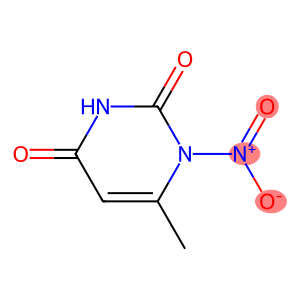

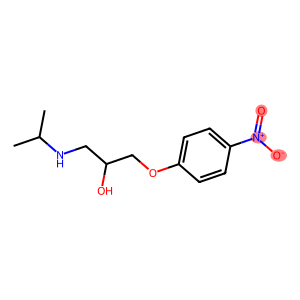

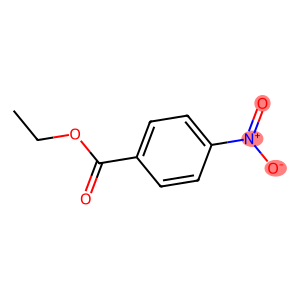

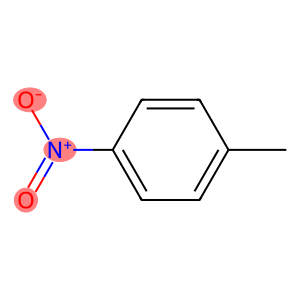

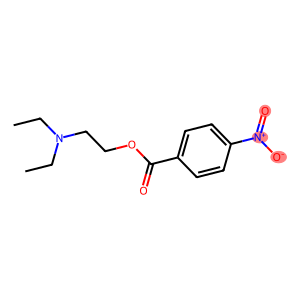

SMARTS: [N](=O)=O
Подструктура [N](=O)=O не найдена в молекуле CC1=CC(=O)NC(=O)N1[N+](=O)[O-]
Подструктура [N](=O)=O не найдена в молекуле CC(C)NCC(O)COc1ccc(cc1)[N](=O)=O
Подструктура [N](=O)=O не найдена в молекуле CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-]
Подструктура [N](=O)=O не найдена в молекуле CC1=CC=C(C=C1)[N](=O)=O
Подструктура [N](=O)=O не найдена в молекуле CCN(CC)CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-]


In [ ]:
# Пример SMILES с нитрогруппами, записанными разными способами
smiles_list = [
    'CC1=CC(=O)NC(=O)N1[N+](=O)[O-]',          # Nitrofurantoin, классический нитро [N+](=O)[O-]
    'CC(C)NCC(O)COc1ccc(cc1)[N](=O)=O',        # Метронидазол, нитро как N(=O)=O
    'CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-]',       # Nitroaspirin, классический нитро
    'CC1=CC=C(C=C1)[N](=O)=O',                  # Nitrobenzene, альтернативное представление
    'CCN(CC)CCOC(=O)C1=CC=C(C=C1)[N+](=O)[O-]',# Nitroglycerin derivative
]

# Расчёт дескрипторов PaDEL
desc = from_smiles(smiles_list, descriptors=True, fingerprints=False)
df_desc = pd.DataFrame(desc)
df_desc['SMILES'] = smiles_list

# Несколько вариантов SMARTS для нитро-группы
nitro_smarts_list = [
    '[N+](=O)[O-]',  # классический нитро ион
    '[N](=O)=O',     # альтернативная запись нитро-группы
]

# Подсчёт наличия и количества нитро-групп для каждого SMARTS
for i, smarts in enumerate(nitro_smarts_list):
    pattern = Chem.MolFromSmarts(smarts)
    counts = []
    presence = []
    for smi in smiles_list:
        mol = Chem.MolFromSmiles(smi)
        matches = mol.GetSubstructMatches(pattern)
        counts.append(len(matches))
        presence.append(int(len(matches) > 0))
    df_desc[f'Nitro_Count_{i+1}'] = counts
    df_desc[f'Has_Nitro_{i+1}'] = presence

# Вывод результатов
print("Таблица с подсчётом нитрогрупп разными SMARTS:")
display(df_desc[['SMILES'] + [f'Nitro_Count_{i+1}' for i in range(len(nitro_smarts_list))] +
                 [f'Has_Nitro_{i+1}' for i in range(len(nitro_smarts_list))]])

# Визуализация молекул с подсветкой нитро-групп для каждого SMARTS
def highlight_substructure(smiles, smarts):
    mol = Chem.MolFromSmiles(smiles)
    patt = Chem.MolFromSmarts(smarts)
    matches = mol.GetSubstructMatches(patt)
    if not matches:
        print(f"Подструктура {smarts} не найдена в молекуле {smiles}")
        return
    img = Draw.MolToImage(mol, highlightAtoms=matches[0], size=(300,300))
    display(img)

print("Визуализация нитрогрупп разными SMARTS:")
for smarts in nitro_smarts_list:
    print(f"SMARTS: {smarts}")
    for smi in smiles_list:
        highlight_substructure(smi, smarts)


Фрагментарные дескрипторы PaDEL (пример):


,SMILES
0,CCO
1,c1ccccc1Cl
2,CN1C=NC2=C1C(=O)N(C(=O)N2C)C


Визуализация гидроксильной группы в молекулах:


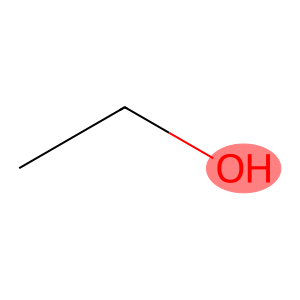

Подструктура [OX2H] не найдена в молекуле c1ccccc1Cl
Подструктура [OX2H] не найдена в молекуле CN1C=NC2=C1C(=O)N(C(=O)N2C)C


In [ ]:
# Пример SMILES
smiles_list = [
    'CCO',               # этанол
    'c1ccccc1Cl',
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'  # кофеин
]

# Расчёт дескрипторов PaDEL (все дескрипторы)
desc = from_smiles(smiles_list, descriptors=True, fingerprints=False)
df_desc = pd.DataFrame(desc)
df_desc['SMILES'] = smiles_list

# Выводим несколько столбцов с фрагментарными дескрипторами (обычно в названиях есть паттерны)
frag_cols = [col for col in df_desc.columns if 'Substructure' in col or 'Fragment' in col or 'Count' in col]
print("Фрагментарные дескрипторы PaDEL (пример):")
display(df_desc[['SMILES'] + frag_cols[:10]])

# Визуализация подструктуры по SMARTS с помощью RDKit
def highlight_substructure(smiles, smarts):
    mol = Chem.MolFromSmiles(smiles)
    patt = Chem.MolFromSmarts(smarts)
    matches = mol.GetSubstructMatches(patt)
    if not matches:
        print(f"Подструктура {smarts} не найдена в молекуле {smiles}")
        return
    img = Draw.MolToImage(mol, highlightAtoms=matches[0], size=(300,300))
    display(img)

# Пример: визуализация гидроксильной группы [OX2H]
print("Визуализация гидроксильной группы в молекулах:")
for smi in smiles_list:
    highlight_substructure(smi, '[OX2H]')


In [ ]:
from padelpy import from_smiles
import pandas as pd

smiles_list = [
    'CCO',
    'c1ccccc1Cl',
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
]

desc = from_smiles(
    smiles_list,
    descriptors=True,
    fingerprints=False,
    threads=1,
    maxruntime=60
)

df_desc = pd.DataFrame(desc)
df_desc['SMILES'] = smiles_list
print(df_desc.head())


  nAcid                ALogP                ALogp2                 AMR  \
0     0  -0.1075999999999997  0.011577759999999935             12.5551   
1     0               0.7443            0.55398249              5.6156   
2     0  -0.9595000000000007    0.9206402500000013  49.712300000000006   

                 apol naAromAtom nAromBond nAtom nHeavyAtom  nH  ...  \
0            8.322758          0         0     9          3   6  ...   
1           16.073965          6         6    12          7   5  ...   
2  26.751929999999987          5         5    24         14  10  ...   

                  P2s                 E1s                  E2s  \
0  0.3253563741476061  0.7268139794699618  0.48325084152260905   
1  0.4537600616236917   0.430369079767424   0.4974902750867542   
2  0.3487432573967707  0.5487935308702614   0.5293463949235321   

                   E3s                  Ts                  As  \
0   0.3996699679146632  2.1537824684988482  1.4044575776621473   
1   0.37715331276

### Расчет корреляций и понижение размерности

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

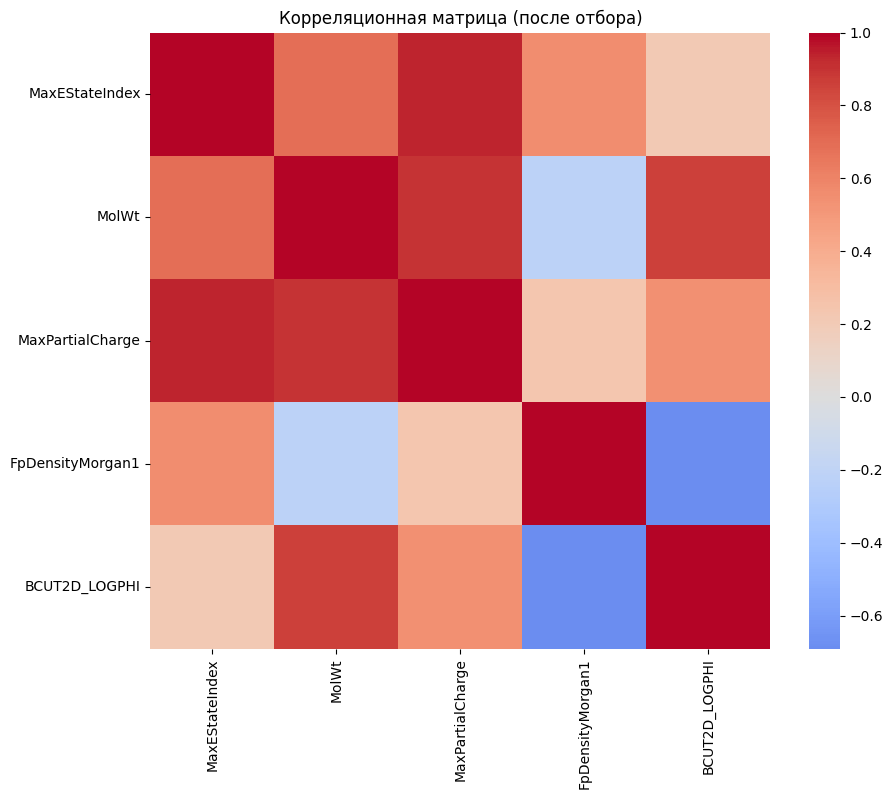

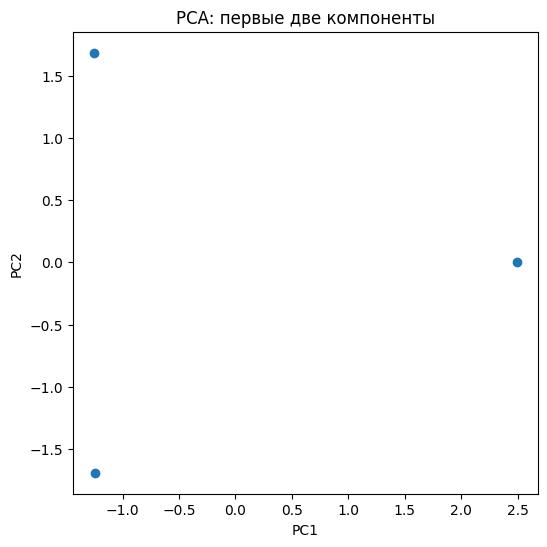

Нет колонки target, важность признаков не рассчитывается.


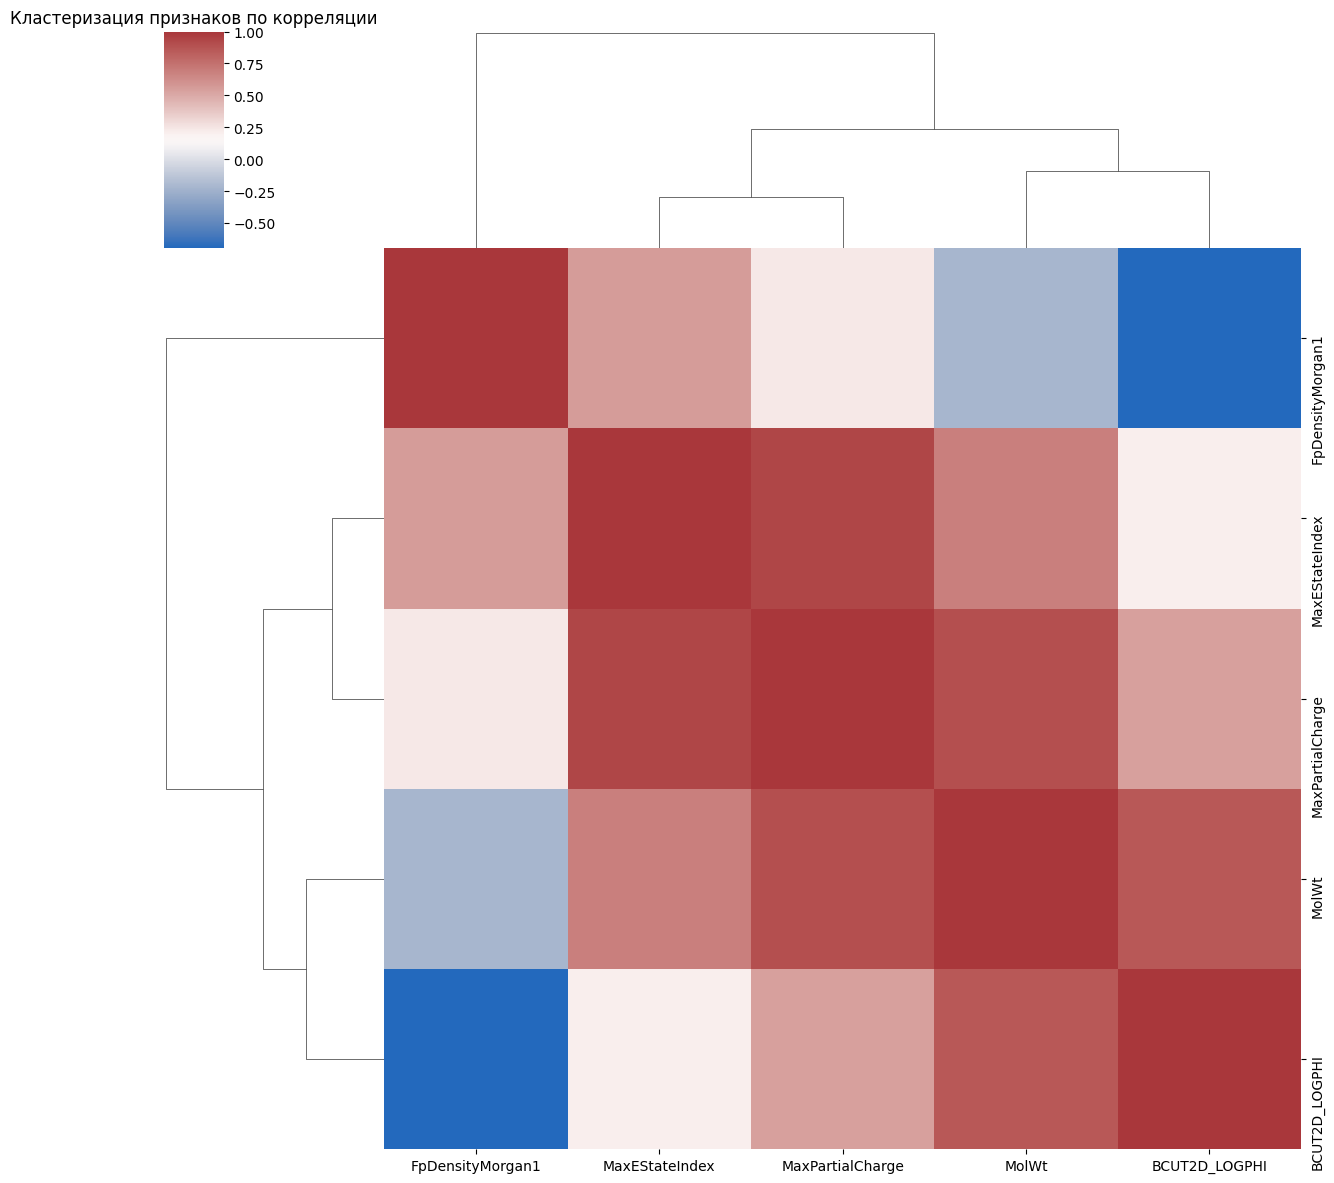

In [ ]:
# 1. Удаление нечисловых и идентификационных столбцов (например, SMILES, названия)
non_feature_cols = [col for col in df.columns if df[col].dtype == 'object']
df_features = df.drop(columns=non_feature_cols)

# 2. Заполнение пропусков (например, медианой)
df_features = df_features.fillna(df_features.median())

# 3. Удаление константных и квази-константных признаков
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(df_features)
selected_cols = df_features.columns[selector.get_support()]
df_var = pd.DataFrame(X_var, columns=selected_cols)

# 4. Анализ корреляций
corr = df_var.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df_uncorr = df_var.drop(columns=to_drop)

plt.figure(figsize=(10,8))
sns.heatmap(df_uncorr.corr(), cmap='coolwarm', center=0)
plt.title('Корреляционная матрица (после отбора)')
plt.show()

# 5. Снижение размерности (PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_uncorr)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('PCA: первые две компоненты')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 6. Оценка важности признаков (пример для задачи регрессии/классификации)
# Замените 'target' на вашу целевую переменную, если она есть
if 'target' in df.columns:
    y = df['target']
    model = RandomForestRegressor() if y.dtype.kind in 'fc' else RandomForestClassifier()
    model.fit(df_uncorr, y)
    importances = pd.Series(model.feature_importances_, index=df_uncorr.columns)
    top_features = importances.sort_values(ascending=False).head(20)
    plt.figure(figsize=(8,6))
    top_features.plot(kind='barh')
    plt.title('Топ-20 важных признаков')
    plt.show()
else:
    print('Нет колонки target, важность признаков не рассчитывается.')

# 7. Быстрый анализ связей между признаками (корреляции, кластеризация)
sns.clustermap(df_uncorr.corr(), cmap='vlag', figsize=(12,12))
plt.title('Кластеризация признаков по корреляции')
plt.show()


Всего записей из ChEMBL: 713
Исходное количество строк: 713
После фильтрации по Ki и nM: 713 (уменьшилось на 0)
После удаления строк без MOL/Ki: 699
После расчета дескрипторов: 699 строк
Колонки после RDKit-дескрипторов (210):
['MOL', 'pValue', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PE

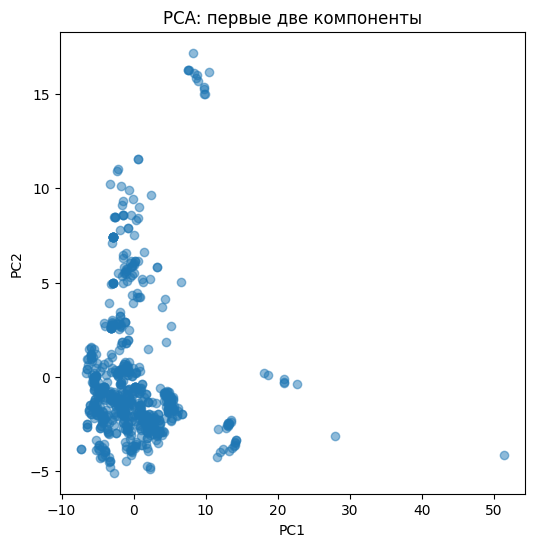

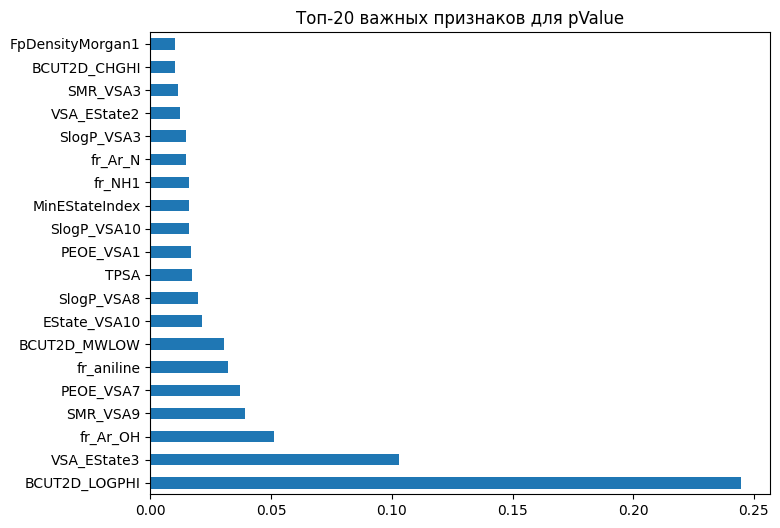

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


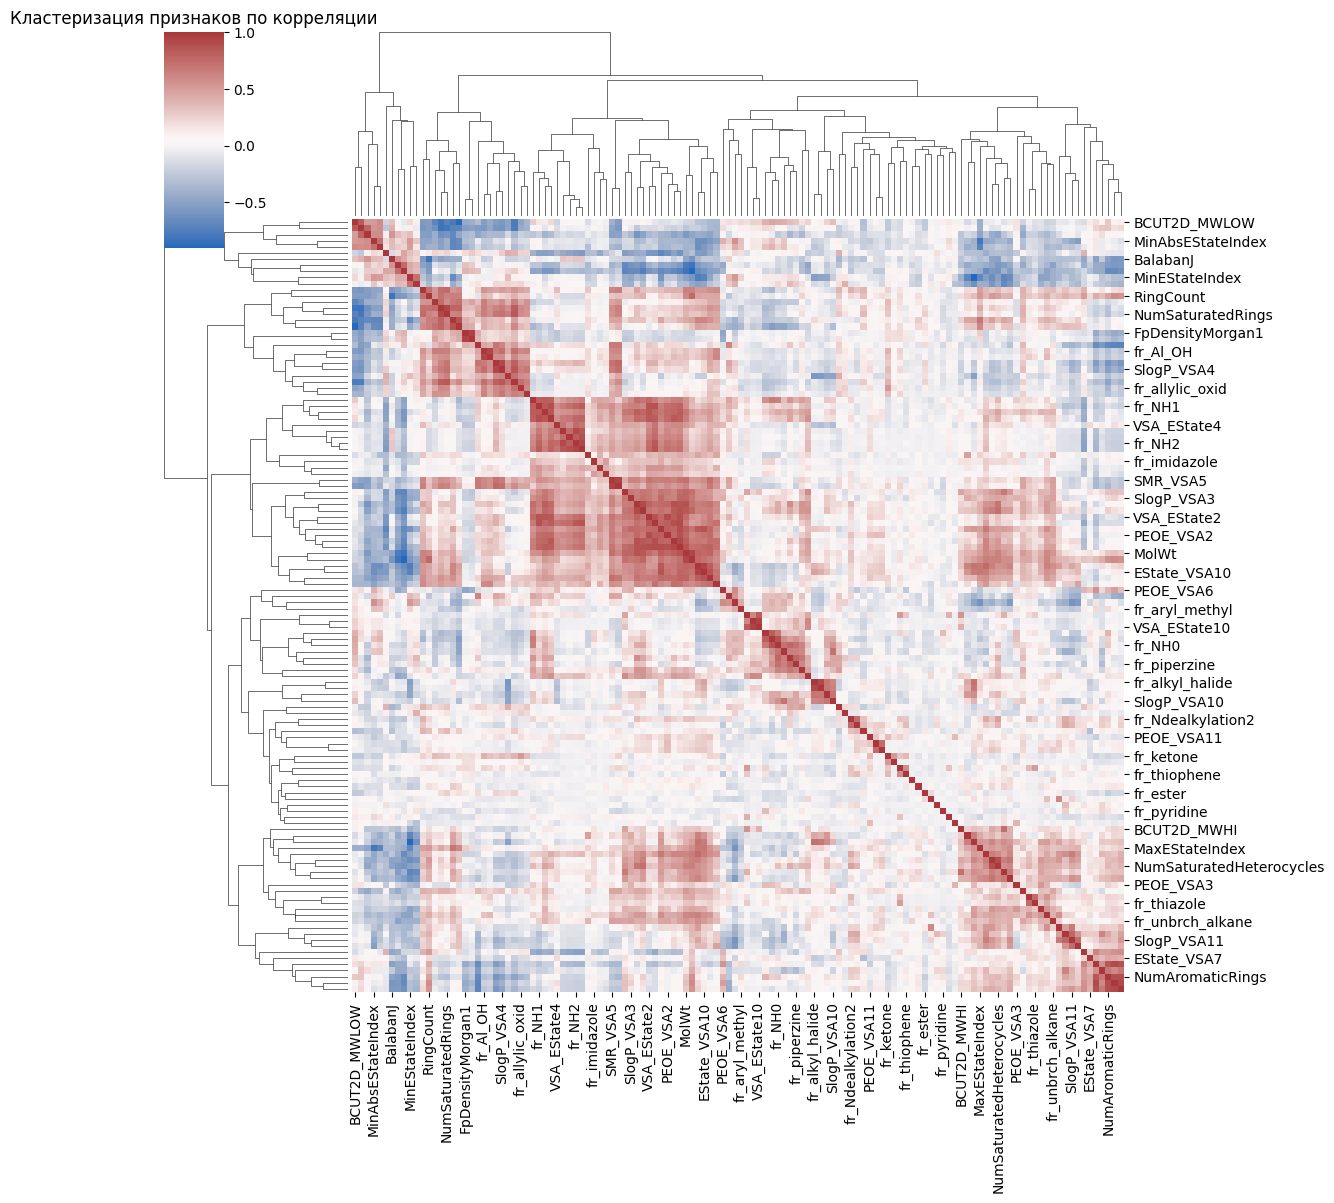

In [ ]:
import pandas as pd
import numpy as np
import requests
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных ChEMBL по Ki для эстрогенового альфа-рецептора
url = ("https://www.ebi.ac.uk/chembl/api/data/activity.json?"
       "target_chembl_id=CHEMBL206&standard_type=Ki&standard_units=nM&limit=10000")
resp = requests.get(url)
data = resp.json()['activities']
print(f'Всего записей из ChEMBL: {len(data)}')

# 2. Преобразование в DataFrame и фильтрация
df = pd.DataFrame(data)
print(f'Исходное количество строк: {len(df)}')
df = df[df['standard_units'] == 'nM']
df = df[df['standard_type'] == 'Ki']
print(f'После фильтрации по Ki и nM: {len(df)} (уменьшилось на {len(data)-len(df)})')

# 3. Оставляем только RowMol (если есть) или SMILES и pValue
mol_col = 'RowMol' if 'RowMol' in df.columns else 'canonical_smiles'
df = df[df[mol_col].notna() & df['standard_value'].notna()]
df['Ki_nM'] = pd.to_numeric(df['standard_value'], errors='coerce')
df = df[df['Ki_nM'] > 0]
df['pValue'] = 9 - np.log10(df['Ki_nM'])
df = df[[mol_col, 'pValue']].rename(columns={mol_col: 'MOL'})
print(f'После удаления строк без MOL/Ki: {len(df)}')

# 4. Расчет всех дескрипторов RDKit (без проверки валидности)
desc_names = [d[0] for d in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_names)

desc_data = []
for mol_repr in df['MOL']:
    mol = None
    # Пробуем сначала как molblock, потом как SMILES
    try:
        mol = Chem.MolFromMolBlock(mol_repr, sanitize=True)
    except Exception:
        mol = None
    if mol is None:
        try:
            mol = Chem.MolFromSmiles(mol_repr)
        except Exception:
            mol = None
    # Если молекула невалидна, дескрипторы будут NaN
    if mol is not None:
        vals = calc.CalcDescriptors(mol)
        desc_data.append(vals)
    else:
        desc_data.append([np.nan]*len(desc_names))

df_desc = pd.DataFrame(desc_data, columns=desc_names)
df_rdkit = df.reset_index(drop=True).join(df_desc)
print(f'После расчета дескрипторов: {len(df_rdkit)} строк')
print(f'Колонки после RDKit-дескрипторов ({len(df_rdkit.columns)}):')
print(list(df_rdkit.columns))

# 5. Постобработка дескрипторов
X = df_rdkit.drop(columns=['MOL', 'pValue'])
print(f'\nНачальная размерность признаков: {X.shape}, строк: {X.shape[0]}')
print(f'Колонки: {list(X.columns)}')

# 6. Удаляем нечисловые признаки (на всякий случай)
X = X.select_dtypes(include=[np.number])
print(f'\nПосле удаления нечисловых признаков: {X.shape[0]} строк, {X.shape[1]} признаков')
print(f'Колонки: {list(X.columns)}')

# 7. Удаляем признаки, где есть хотя бы один inf, -inf, NaN или экстремум
extreme = 1e6
bad_cols = []
for col in X.columns:
    if (np.isnan(X[col]).any() or np.isinf(X[col]).any() or (np.abs(X[col]) > extreme).any()):
        bad_cols.append(col)
X = X.drop(columns=bad_cols)
print(f'\nПосле удаления признаков с NaN/inf/extreme: {X.shape[0]} строк, {X.shape[1]} признаков')
print(f'Колонки: {list(X.columns)}')

# 8. Удаляем строки, где есть NaN/inf/extreme
before = X.shape[0]
mask = (~X.isnull().any(axis=1)) & (~np.isinf(X).any(axis=1)) & ((np.abs(X) < extreme).all(axis=1))
X = X[mask]
y = df_rdkit.loc[X.index, 'pValue']
after = X.shape[0]
if after < before:
    print(f'\nПосле удаления строк с NaN/inf/extreme: {after} (уменьшилось на {before-after})')
else:
    print(f'\nПосле удаления строк с NaN/inf/extreme: {after} (строк не изменилось)')
print(f'Колонки: {list(X.columns)}')

# 9. Заполняем оставшиеся NaN медианой (на всякий случай)
X = X.fillna(X.median())
print(f'\nПосле заполнения NaN медианой: {X.shape[0]} строк, {X.shape[1]} признаков')
print(f'Колонки: {list(X.columns)}')

# 10. Удаляем константные признаки
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)
selected_cols = X.columns[selector.get_support()]
X_var = pd.DataFrame(X_var, columns=selected_cols, index=X.index)
print(f'\nПосле VarianceThreshold: {X_var.shape[0]} строк, {X_var.shape[1]} признаков')
print(f'Колонки: {list(X_var.columns)}')

# 11. Удаляем высоко коррелированные признаки
corr = X_var.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_uncorr = X_var.drop(columns=to_drop)
print(f'\nПосле удаления коррелированных признаков: {X_uncorr.shape[0]} строк, {X_uncorr.shape[1]} признаков')
print(f'Колонки: {list(X_uncorr.columns)}')

# 12. Масштабируем и PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_uncorr)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f'\nПосле PCA: {X_pca.shape[0]} строк, 2 компоненты')

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title('PCA: первые две компоненты')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 13. Важность признаков (RandomForest)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_uncorr, y)
importances = pd.Series(rf.feature_importances_, index=X_uncorr.columns)
top_features = importances.sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
top_features.plot(kind='barh')
plt.title('Топ-20 важных признаков для pValue')
plt.show()

# 14. Кластеризация по корреляции
sns.clustermap(X_uncorr.corr(), cmap='vlag', figsize=(12,12))
plt.title('Кластеризация признаков по корреляции')
plt.show()
